# Importing Library

In [1660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negitive matrix Factorization
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB

#Principal Component Analysis
from sklearn.decomposition import PCA

#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing Stopwords
import nltk
from nltk.corpus import stopwords

#for tokenization
from nltk.tokenize import word_tokenize

#for POS tagging(Part of speach in NLP Sentiment Analysis)
#nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
#!pip install contractions
#!pip install gensim
import gensim
from gensim import corpora

#import shap for model explainability
!pip install shap
import shap

# for granularity of reporting
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [1661]:
hotel_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

In [1662]:
review_df = pd.read_csv('Zomato Restaurant reviews.csv')

In [1663]:
hotel_df

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [1664]:
review_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [1665]:
# Dimensions of Data Set
print('Total numbers of rows and columns in hotel_df dataset',hotel_df.shape)
print('Total numbers of rows and columns in review_df dataset',review_df.shape)

Total numbers of rows and columns in hotel_df dataset (105, 6)
Total numbers of rows and columns in review_df dataset (10000, 7)


# Dataset Information

In [1667]:
print(hotel_df.info())

print('*'*141)

print(review_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
None
*********************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   o

# Checking Duplicates

In [1669]:
print('duplicates in hotel_df', hotel_df.duplicated().sum())
print('duplicates in review_df', review_df.duplicated().sum())

duplicates in hotel_df 0
duplicates in review_df 36


In [1670]:
review_df[review_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

# Missing/Null_Values 

In [1672]:
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [1673]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

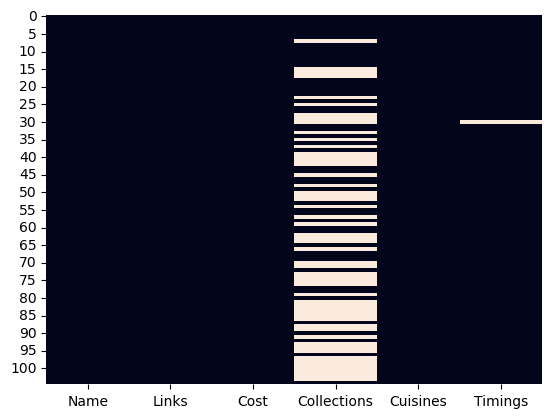

In [1674]:
# visualizing the missing value for restaurant
# checking null value 
sns.heatmap(hotel_df.isnull(), cbar = False)

<Axes: >

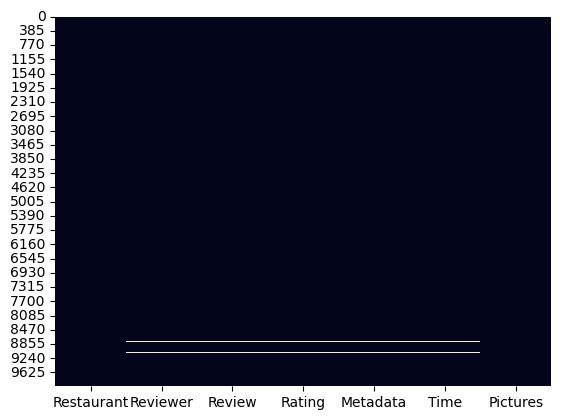

In [1675]:
sns.heatmap(review_df.isnull(), cbar = False)

### Insights

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


# Understanding the Variables

In [1679]:
hotel_df.columns.tolist()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [1680]:
review_df.columns.tolist()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [1681]:
#statistics

In [1682]:
hotel_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [1683]:
review_df.describe().T

count  mean  std  min  25%  50%  75%   max
Pictures 10000.00  0.75 2.57 0.00 0.00 0.00 0.00 64.00

In [1684]:
review_df.describe(include = 'O').T

count unique              top  freq
Restaurant  10000    100  Beyond Flavours   100
Reviewer     9962   7446      Parijat Ray    13
Review       9955   9364             good   237
Rating       9962     10                5  3832
Metadata     9962   2477         1 Review   919
Time         9962   9782  7/29/2018 20:34     3

# Attributes Info

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review




# Checking the Unique Variables

In [1688]:
for i in hotel_df.columns:
    print(f'{i}',hotel_df[i].nunique())

Name 105
Links 105
Cost 29
Collections 42
Cuisines 92
Timings 77


In [1689]:
for i in review_df.columns:
    print(f'{i}',review_df[i].nunique())

Restaurant 100
Reviewer 7446
Review 9364
Rating 10
Metadata 2477
Time 9782
Pictures 36


# Data Cleaning

In [1691]:
hotel = hotel_df.copy()
review = review_df.copy()

In [1692]:
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [1693]:
hotel['Cost'] = hotel_df['Cost'].str.replace(',','').astype('int64')

In [1694]:
# top 5 Expensive restaurant
hotel.sort_values('Cost', ascending=False)[['Name', 'Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [1695]:
# top 5 budget friendly restaurant
hotel.sort_values('Cost', ascending=False)[['Name', 'Cost']][-1:-6:-1]

Name  Cost
23                  Amul   150
89   Mohammedia Shawarma   150
101         Sweet Basket   200
29    Hunger Maggi Point   200
85         Momos Delight   200

In [1696]:
hotel_dict = {}
amount = hotel.Cost.values.tolist()

#adding hotel name based on the price by converting to list
for price in amount:
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows['Name'].tolist()

#converting the DataFrame
same_price_hotel_df = pd.DataFrame.from_dict([hotel_dict]).T.reset_index().rename(columns = {'index':'Cost', 0: 'Name of Restaurant'})

#getting hotel counts
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values('Cost', ascending = False)

#merging 
same_price_hotel_df = pd.merge(same_price_hotel_df,hotel_count, how='inner', on='Cost').rename(columns={'Name':'Total_Restaurant'}).sort_values('Total_Restaurant', ascending=False)

In [1697]:
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

Cost                                 Name of Restaurant  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [1698]:
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [1699]:
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [1700]:
cuisine_dict = {}
for i in cuisine_value_list:
    for j in i:
        if j in cuisine_dict:
            cuisine_dict[j] += 1
        else:
            cuisine_dict[j] = 1



In [1701]:
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).T.reset_index().rename(columns = {'index':'Cuisine', 0:'Number of Restaurants'})

In [1702]:
cuisine_df

Cuisine  Number of Restaurants
0         Chinese                     43
1     Continental                     21
2           Kebab                      6
3        European                      4
4    South Indian                      9
5    North Indian                     61
6         Biryani                     16
7           Asian                     15
8   Mediterranean                      5
9        Desserts                     13
10        Seafood                      4
11      Beverages                      5
12           Goan                      1
13   Healthy Food                      1
14       Lebanese                      1
15       American                      6
16      Ice Cream                      2
17    Street Food                      2
18      Fast Food                     15
19            BBQ                      2
20        Italian                     14
21    Finger Food                      2
22         Burger                      5
23       Japanese                      2
24          Salad                      5
25          Sushi                      4
26        Mexican                      1
27        Mughlai                      6
28         Andhra                      6
29         Bakery                      7
30         Juices                      1
31        Arabian                      2
32     Hyderabadi                      4
33           Cafe                      6
34        Spanish                      1
35          Wraps                      1
36           Thai                      3
37     Indonesian                      1
38  Modern Indian                      2
39          Momos                      4
40          Pizza                      1
41  North Eastern                      1
42         Mithai                      1
43      Malaysian                      1

In [1703]:
cuisine_df.sort_values('Number of Restaurants', ascending = False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [1704]:
collections_value_list = hotel.Collections.dropna().str.split(', ')

In [1705]:
collections_value_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [1706]:
collections_dict = {}
for i in collections_value_list:
    for j in i:
        if j in collections_dict:
            collections_dict[j] += 1
        else:
            collections_dict[j] = 1

In [1707]:
collections_df = pd.DataFrame.from_dict([collections_dict]).T.reset_index().rename(columns = {'index':'Tags', 0:'Number of Restaurants'})

In [1708]:
collections_df.sort_values('Number of Restaurants', ascending = False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

In [1709]:
review['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [1710]:
# there is a one Rating which is Like, will convert it into 0 
review.loc[review['Rating']=='Like'] = 0

In [1711]:
review['Rating'].value_counts()

5      3832
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
0         1
Name: Rating, dtype: int64

In [1712]:
# Changing the data type of the Rating column because every values are in decimals
review['Rating'] =  review['Rating'].astype('float')

In [1713]:
review.loc[review['Rating'] == 0] = review.Rating.median()

In [1714]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [1715]:
review['Reviewer_Total_Review'] = review.Metadata.str.split(',', expand = True)[0]
review['Reviewer_follower'] = review.Metadata.str.split(',', expand = True)[1]

In [1716]:
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ', expand = True)[0])
review['Reviewer_follower'] = pd.to_numeric(review['Reviewer_follower'].str.split(' ', expand = True)[1])

In [1717]:
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...    5.00   
1     Ambience is too good for a pleasant evening. S...    5.00   
2     A must try.. great food great ambience. Thnx f...    5.00   
3     Soumen das and Arun was a great guy. Only beca...    5.00   
4     Food is good.we ordered Kodi drumsticks and ba...    5.00   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...    3.00   
9996  This place has never disappointed us.. The foo...    4.50   
9997  Bad rating is mainly because of "Chicken Bone ...    1.50   
9998  I personally love and prefer Chinese Food. Had...    4.00   
9999  Checked in here to try some delicious chinese ...    3.50   

                          Metadata             Time  Pictures  \
0           1 Review , 2 Followers  5/25/2019 15:54         0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0   
3            1 Review , 1 Follower  5/24/2019 22:11         0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0   
...                            ...              ...       ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6   

      Reviewer_Total_Review  Reviewer_follower  
0                      1.00               2.00  
1                      3.00               2.00  
2                      2.00               3.00  
3                      1.00               1.00  
4                      3.00               2.00  
...                     ...                ...  
9995                  53.00              54.00  
9996                   2.00              53.00  
9997                  65.00             423.00  
9998                  13.00             144.00  
9999                 472.00            1302.00  

[10000 rows x 9 columns]

In [1718]:
review['Time'] = pd.to_datetime(review['Time'], errors = 'coerce')
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hours'] = pd.DatetimeIndex(review['Time']).hour

In [1719]:
review.isna().sum()

Restaurant                  0
Reviewer                   38
Review                     45
Rating                     38
Metadata                   38
Time                       38
Pictures                    0
Reviewer_Total_Review      39
Reviewer_follower        1617
Review_Year                38
Review_Month               38
Review_Hours               38
dtype: int64

In [1720]:
# Avarage engagement on resturatns
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean', 'Reviewer': 'count'}).reset_index().rename({'Reviewer':'Total_Review'})

In [1721]:
avg_hotel_rating

Restaurant  Rating  Reviewer
0                                     4.00    4.00         1
1                        10 Downing Street    3.80       100
2                                 13 Dhaba    3.48       100
3           3B's - Buddies, Bar & Barbecue    4.76       100
4                AB's - Absolute Barbecues    4.88       100
..                                     ...     ...       ...
96              Urban Asia - Kitchen & Bar    3.65       100
97   Yum Yum Tree - The Arabian Food Court    3.56       100
98         Zega - Sheraton Hyderabad Hotel    4.45       100
99                Zing's Northeast Kitchen    3.65       100
100                                eat.fit    3.20       100

[101 rows x 3 columns]

In [1722]:
review[review['Restaurant'] == 4.00] #useless data

Restaurant Reviewer Review  Rating Metadata  \
7601       4.00     4.00   4.00    4.00     4.00   

                              Time  Pictures  Reviewer_Total_Review  \
7601 1970-01-01 00:00:00.000000004         4                    NaN   

      Reviewer_follower  Review_Year  Review_Month  Review_Hours  
7601                NaN      1970.00          1.00          0.00

In [1723]:
review.drop(7601,axis = 0, inplace=True)

In [1724]:
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...    5.00   
1     Ambience is too good for a pleasant evening. S...    5.00   
2     A must try.. great food great ambience. Thnx f...    5.00   
3     Soumen das and Arun was a great guy. Only beca...    5.00   
4     Food is good.we ordered Kodi drumsticks and ba...    5.00   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...    3.00   
9996  This place has never disappointed us.. The foo...    4.50   
9997  Bad rating is mainly because of "Chicken Bone ...    1.50   
9998  I personally love and prefer Chinese Food. Had...    4.00   
9999  Checked in here to try some delicious chinese ...    3.50   

                          Metadata                Time  Pictures  \
0           1 Review , 2 Followers 2019-05-25 15:54:00         0   
1          3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2          2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3            1 Review , 1 Follower 2019-05-24 22:11:00         0   
4          3 Reviews , 2 Followers 2019-05-24 21:37:00         0   
...                            ...                 ...       ...   
9995     53 Reviews , 54 Followers 2016-06-05 00:08:00         0   
9996      2 Reviews , 53 Followers 2016-06-04 22:01:00         0   
9997    65 Reviews , 423 Followers 2016-06-03 10:37:00         3   
9998    13 Reviews , 144 Followers 2016-05-31 17:22:00         0   
9999  472 Reviews , 1302 Followers 2016-05-31 16:41:00         6   

      Reviewer_Total_Review  Reviewer_follower  Review_Year  Review_Month  \
0                      1.00               2.00      2019.00          5.00   
1                      3.00               2.00      2019.00          5.00   
2                      2.00               3.00      2019.00          5.00   
3                      1.00               1.00      2019.00          5.00   
4                      3.00               2.00      2019.00          5.00   
...                     ...                ...          ...           ...   
9995                  53.00              54.00      2016.00          6.00   
9996                   2.00              53.00      2016.00          6.00   
9997                  65.00             423.00      2016.00          6.00   
9998                  13.00             144.00      2016.00          5.00   
9999                 472.00            1302.00      2016.00          5.00   

      Review_Hours  
0            15.00  
1            14.00  
2            22.00  
3            22.00  
4            21.00  
...            ...  
9995          0.00  
9996         22.00  
9997         10.00  
9998         17.00  
9999         16.00  

[9999 rows x 12 columns]

In [1725]:
review.Restaurant.nunique()

100

In [1726]:
# finding the hotel without review
hotel_without_review = [ name for name in hotel.Name.unique().tolist() if name not in review.Restaurant.unique().tolist()]

In [1727]:
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [1728]:
# top 5 engaging restaurant 
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Reviewer
4        AB's - Absolute Barbecues    4.88       100
12                          B-Dubs    4.81       100
3   3B's - Buddies, Bar & Barbecue    4.76       100
68                        Paradise    4.70       100
36                        Flechazo    4.66       100

In [1729]:
# top5 lowest engaging 
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

Restaurant  Rating  Reviewer
42  Hotel Zara Hi-Fi    2.40       100
11    Asian Meal Box    2.58       100
67     Pakwaan Grand    2.71       100
58     Mathura Vilas    2.82       100
15   Behrouz Biryani    2.83       100

In [1730]:
#finding Most Followed critic
review.isnull().sum()

Restaurant                  0
Reviewer                   38
Review                     45
Rating                     38
Metadata                   38
Time                       38
Pictures                    0
Reviewer_Total_Review      38
Reviewer_follower        1616
Review_Year                38
Review_Month               38
Review_Hours               38
dtype: int64

In [1731]:
most_followed_reviewer = (review.groupby('Reviewer')
                          .agg({'Reviewer_Total_Review':'max', 'Reviewer_follower':'max', 'Rating':'mean'})
                          .rename(columns={'Rating': 'Average_Rating_Given'}).sort_values('Reviewer_follower', ascending = False))


In [1732]:
most_followed_reviewer[:5]

Reviewer_Total_Review  Reviewer_follower  \
Reviewer                                                      
Satwinder Singh                   186.00           13410.00   
Eat_vth_me                         60.00           13320.00   
Samar Sardar                        8.00           11329.00   
Foodies Hyderabad                  31.00            9494.00   
Srinivas                           34.00            7628.00   

                   Average_Rating_Given  
Reviewer                                 
Satwinder Singh                    3.67  
Eat_vth_me                         5.00  
Samar Sardar                       3.50  
Foodies Hyderabad                  4.50  
Srinivas                           3.71

In [1733]:
# finding which year show the max engament
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count'] = hotel_year['Restaurant'].apply(lambda x: len(x))

In [1734]:
hotel_year

Review_Year                                         Restaurant  Count
0      2016.00  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1      2017.00  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2      2018.00  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3      2019.00  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [1735]:
#merging both the dataframe
hotel = hotel.rename(columns = {'Name':'Restaurant'})

In [1736]:
merged = pd.merge(hotel, review, how='inner', on='Restaurant')

In [1737]:
merged

Restaurant                                              Links  \
0      Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
1      Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
2      Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
3      Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
4      Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
...                ...                                                ...   
9994  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9995  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9996  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9997  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9998  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   

      Cost                                        Collections  \
0      800  Food Hygiene Rated Restaurants in Hyderabad, C...   
1      800  Food Hygiene Rated Restaurants in Hyderabad, C...   
2      800  Food Hygiene Rated Restaurants in Hyderabad, C...   
3      800  Food Hygiene Rated Restaurants in Hyderabad, C...   
4      800  Food Hygiene Rated Restaurants in Hyderabad, C...   
...    ...                                                ...   
9994  1000                                                NaN   
9995  1000                                                NaN   
9996  1000                                                NaN   
9997  1000                                                NaN   
9998  1000                                                NaN   

                                               Cuisines  \
0     Chinese, Continental, Kebab, European, South I...   
1     Chinese, Continental, Kebab, European, South I...   
2     Chinese, Continental, Kebab, European, South I...   
3     Chinese, Continental, Kebab, European, South I...   
4     Chinese, Continental, Kebab, European, South I...   
...                                                 ...   
9994                                   Chinese, Seafood   
9995                                   Chinese, Seafood   
9996                                   Chinese, Seafood   
9997                                   Chinese, Seafood   
9998                                   Chinese, Seafood   

                                            Timings              Reviewer  \
0     12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1     12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2     12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3     12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4     12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   
...                                             ...                   ...   
9994              12 Noon to 3:30 PM, 7 PM to 11 PM      Abhishek Mahajan   
9995              12 Noon to 3:30 PM, 7 PM to 11 PM        Sharad Agrawal   
9996              12 Noon to 3:30 PM, 7 PM to 11 PM             Ramandeep   
9997              12 Noon to 3:30 PM, 7 PM to 11 PM       Nayana Shanbhag   
9998              12 Noon to 3:30 PM, 7 PM to 11 PM      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...    5.00   
1     Ambience is too good for a pleasant evening. S...    5.00   
2     A must try.. great food great ambience. Thnx f...    5.00   
3     Soumen das and Arun was a great guy. Only beca...    5.00   
4     Food is good.we ordered Kodi drumsticks and ba...    5.00   
...                                                 ...     ...   
9994  Madhumathi Mahajan Well to start with nice cou...    3.00   
9995  This place has never disappointed us.. The foo...    4.50   
9996  Bad rating is mainly because of "Chicken Bone ...    1.50   
99

In [1738]:
#Rating vs Price 

price_point = merged.groupby('Restaurant').agg({'Rating':'mean', 'Cost':'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [1739]:
#top 5 rated restaurant
price_point.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88      1500.00
11                          B-Dubs    4.81      1600.00
2   3B's - Buddies, Bar & Barbecue    4.76      1100.00
67                        Paradise    4.70       800.00
35                        Flechazo    4.66      1300.00

In [1740]:
#top 5 least rated restaurant
price_point.sort_values('Rating')[:5]

Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi    2.40       400.00
10    Asian Meal Box    2.58       200.00
66     Pakwaan Grand    2.71       400.00
57     Mathura Vilas    2.82       500.00
14   Behrouz Biryani    2.83       600.00

In [1741]:
#most number of rating given by persons
rating_count_df = pd.DataFrame(merged.groupby('Reviewer').size(), columns = ['Rating_Count'])

In [1742]:
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Ankita                  13
Parijat Ray             13
Kiran                   12
Jay Mehta               11
Vedant Killa            11

#### __Data Preprocessing__

* Adjusted data types for cost and rating to ensure consistency.
* Replaced a string rating with the median value for uniformity.
  
#### __Restaurant Dataset Insights__

* **Most expensive restaurant:** Collage - Hyatt Hyderabad Gachibowli (₹2800).<br>
* **Least expensive restaurant:** Amul (₹150).
* Found 13 restaurants sharing the same price point of ₹500.
* North Indian cuisine with buffet tags is a popular combination in restaurants.
  
#### __Review Dataset Insights__

* Identified most engaged restaurants based on reviews.
* **Top critic:** Satwinder Singh with 186 reviews, 13,410 followers, and an average rating of 3.67.
* In 2018, 4,903 restaurants received reviews.

#### __Merged Dataset Analysis__

* **Top-rated restaurant:** AB's - Absolute Barbecues (₹1500 price point).
* **Lowest-rated restaurant:** Hotel Zara Hi-Fi (₹400 price point).
  
#### __Further Analysis Recommendations__

Perform sentiment analysis on reviews to understand ratings despite price points.
Use text extraction and clustering to recommend top-quality restaurants.


# EDA

**1.Distribution Checking**

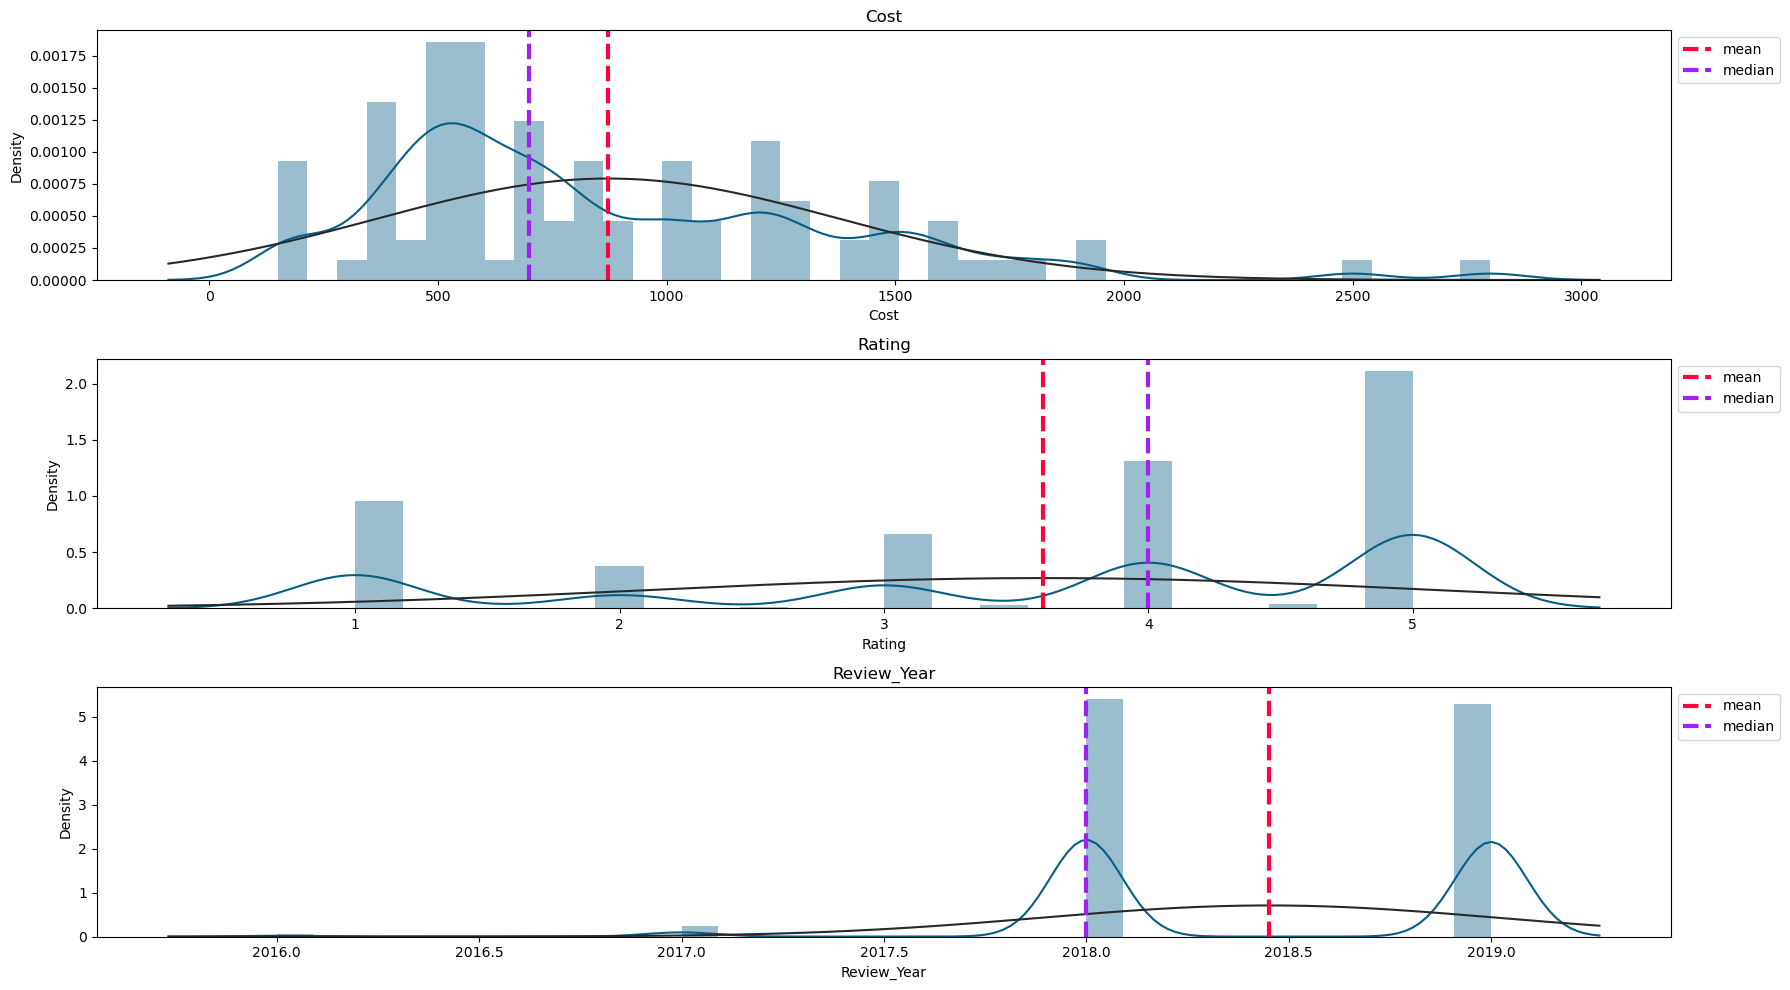

In [1746]:
# Chart - 1 visualization code
plt.figure(figsize = (18,10));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(3,1,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* All three are show skewness.
* Maximum restaurant show price range for 500.
* In 2018 number of reviews are more.
* Price always place important role in any business alongwith rating which show how much engagement are made for the product.
* But in this chart it is unable to figure any impact on business when plotted all alone.

**Maximum Engagement and Lowest Engagement**

In [1749]:
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

In [1750]:
#pip install bar_chart_race

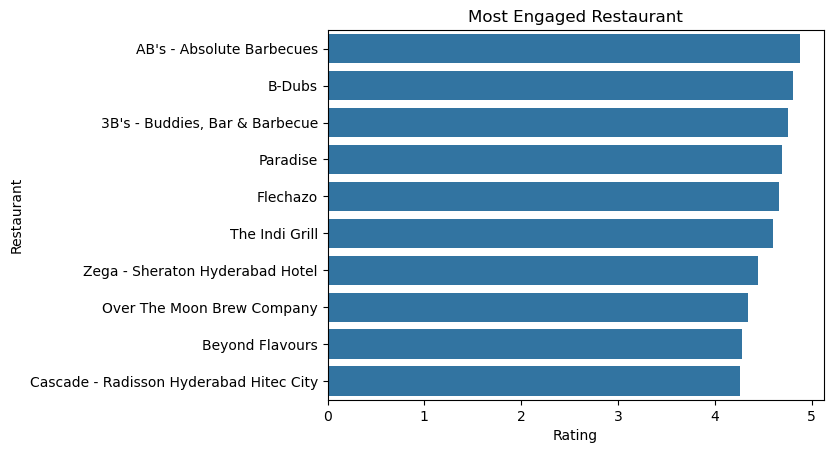

In [1751]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

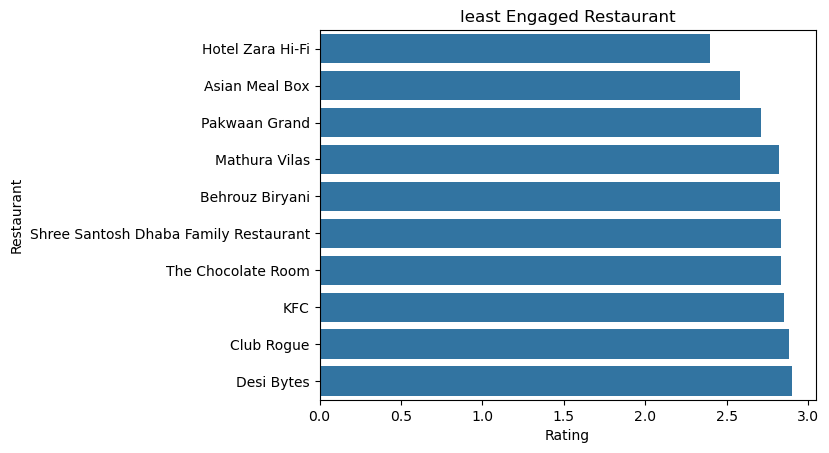

In [1752]:
least_engaged_hotel = price_point.sort_values('Rating')
sns.barplot(data = least_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('least Engaged Restaurant')
plt.show()

* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.
* Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.
* Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.
  

**High Rate and Low Rate Hotel**

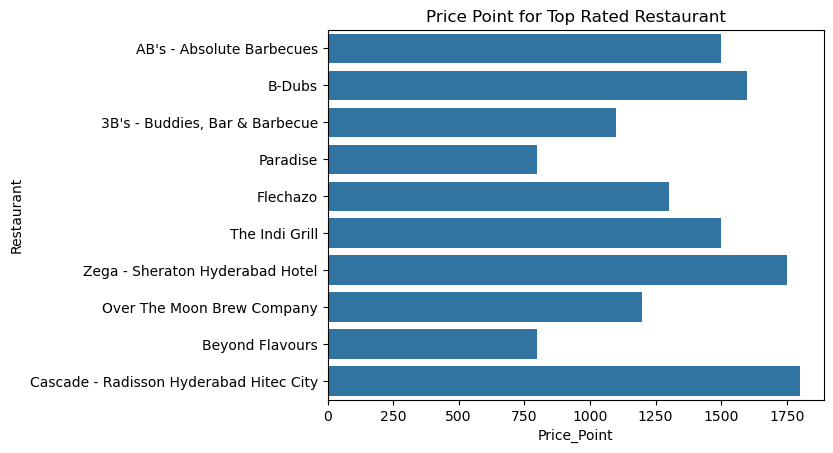

In [1755]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

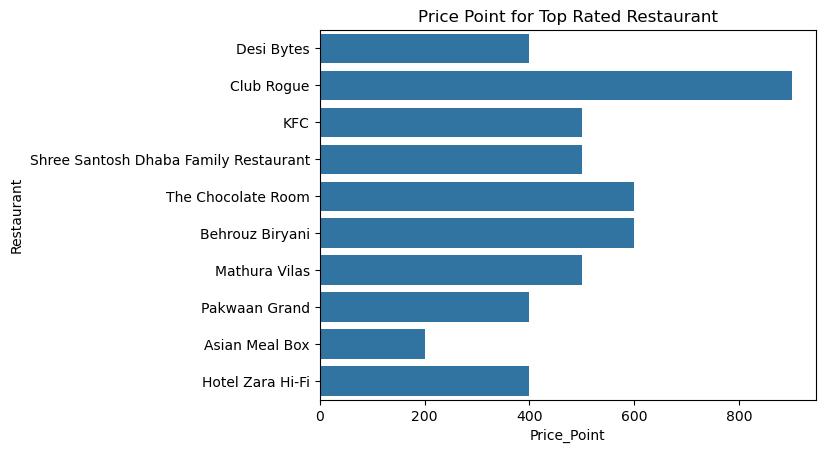

In [1756]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

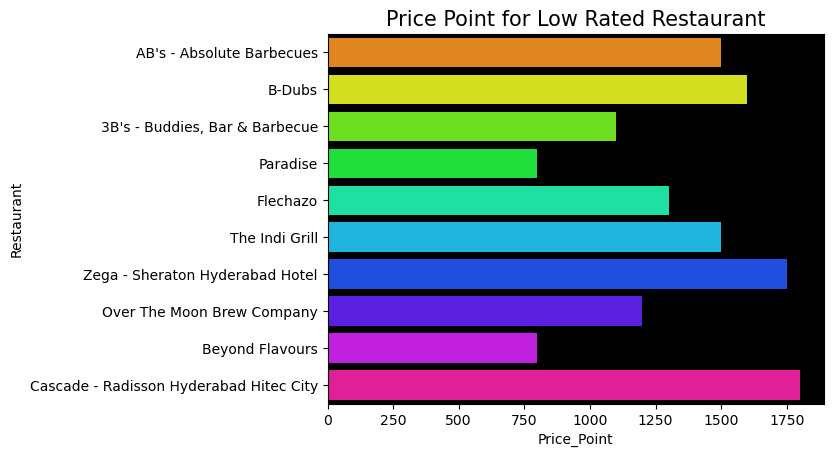

In [1757]:
ax = plt.axes()
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', 
            y = 'Restaurant',palette = 'hsv', ax = ax)
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method

ax.set_facecolor("black")
plt.show()

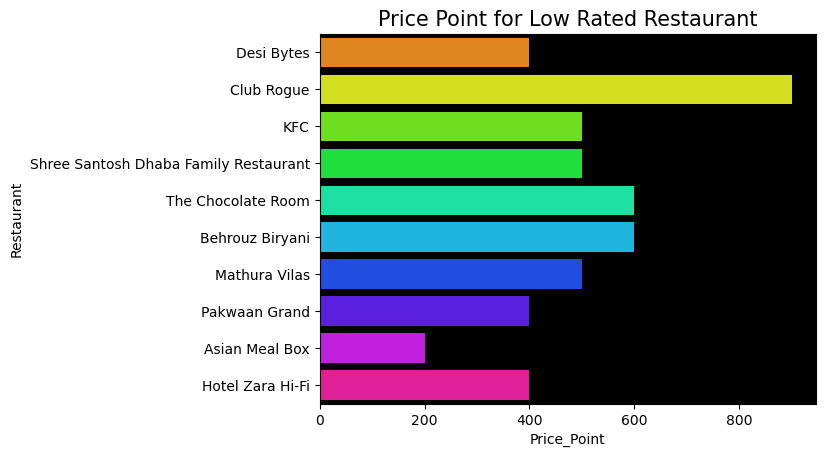

In [1758]:
ax = plt.axes()
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', 
            y = 'Restaurant',palette = 'hsv', ax = ax)
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method

ax.set_facecolor("black")
plt.show()

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.
* Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.
* Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.
* Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.
* However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.


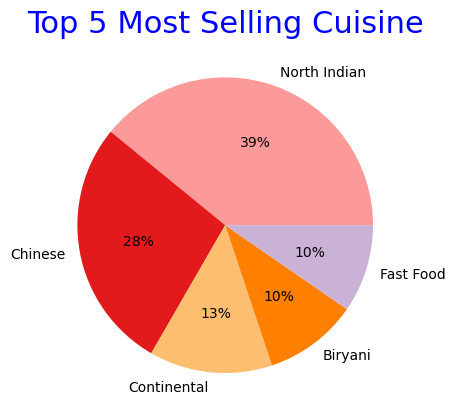

In [1760]:
#for top 5 most selling cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

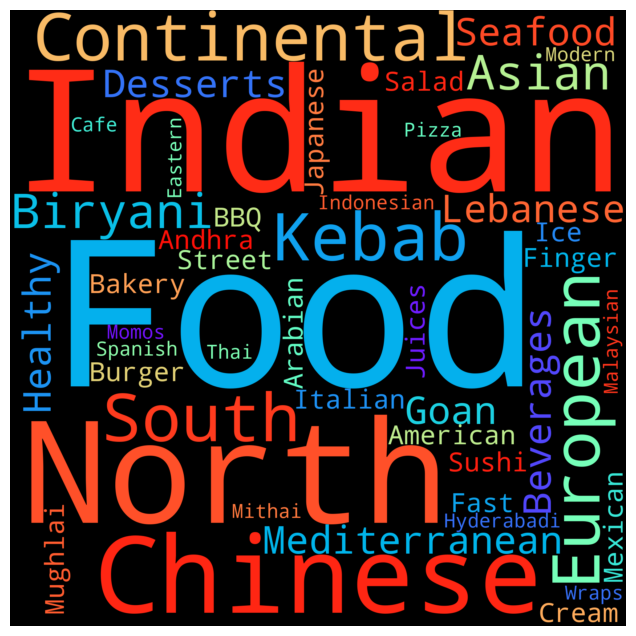

In [1761]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

* Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

* Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.

* If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

* Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.

* Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

* Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

* However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

* Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

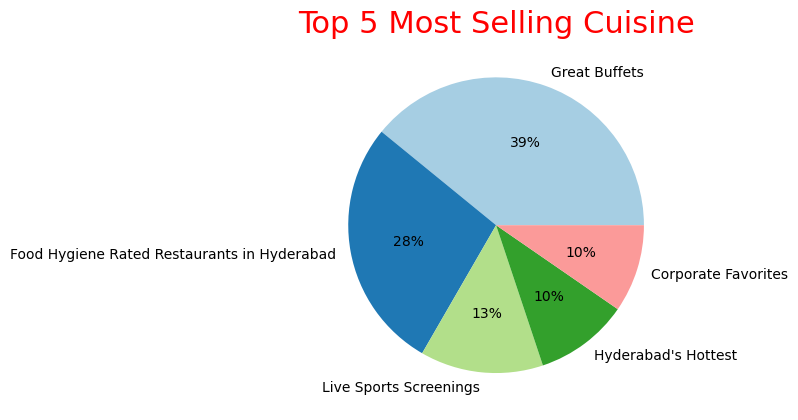

In [1763]:
#top 5 most selling cuisine
collection_list = collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Tags'].tolist()[:5]

data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'red')
plt.show()

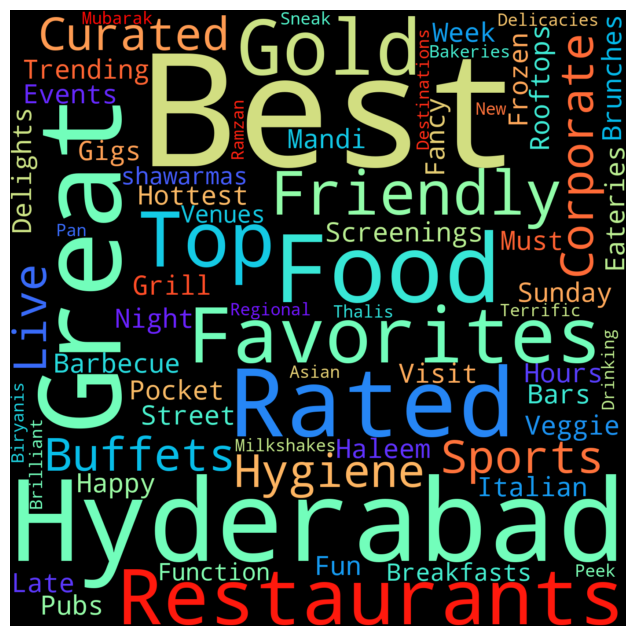

In [1764]:
plt.figure(figsize=(15,8))
text = " ".join(name for name in collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

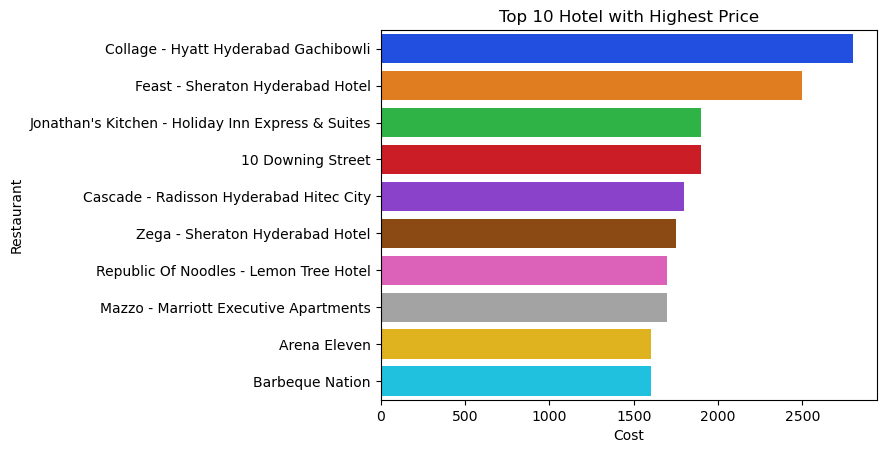

In [1766]:
# hotel with max price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()


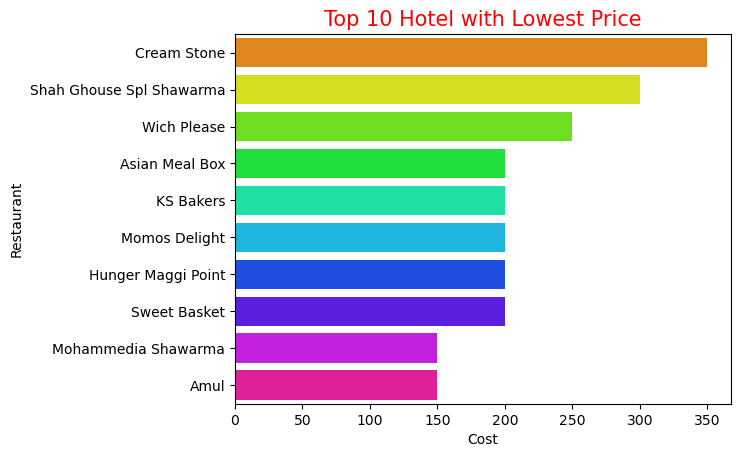

In [1767]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

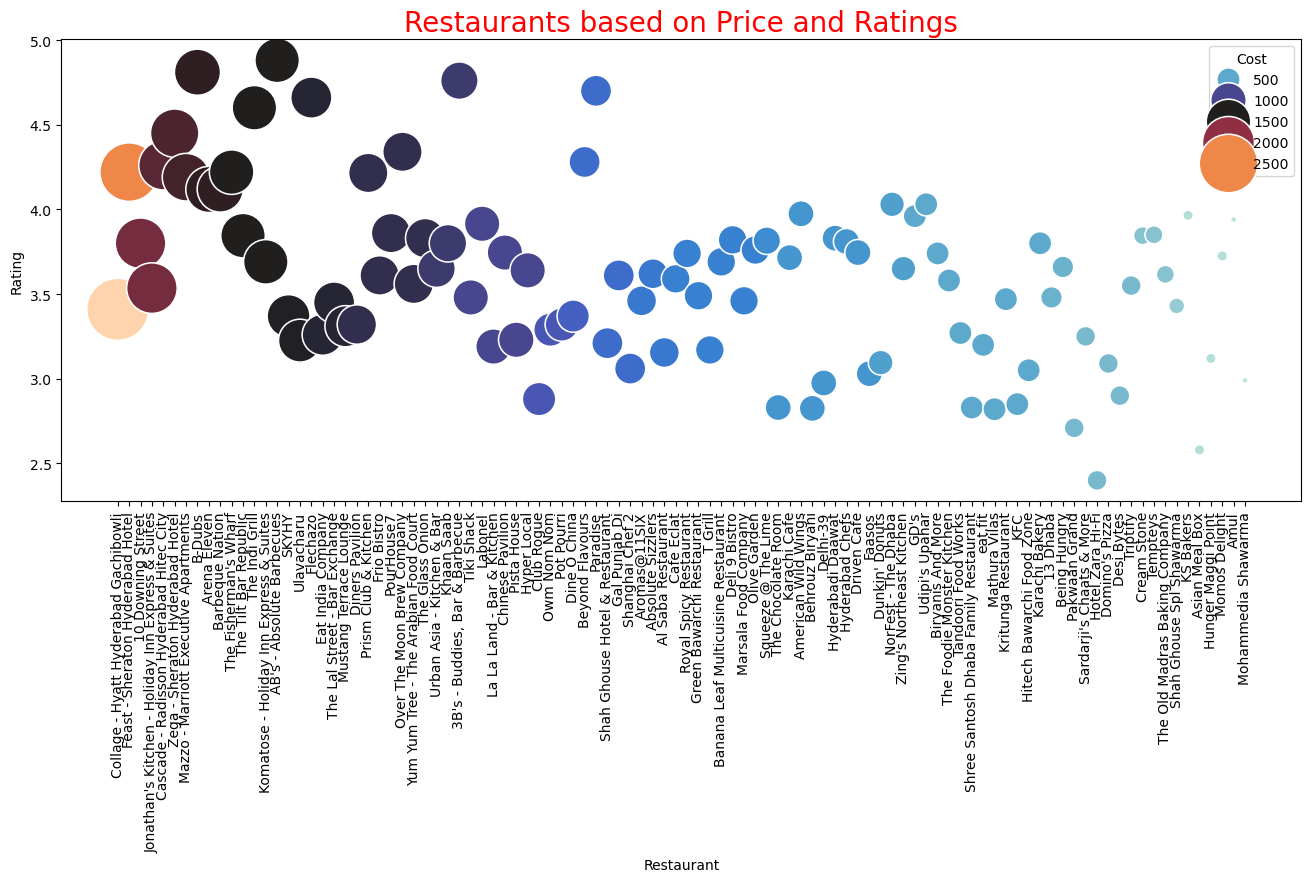

In [1768]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", 
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

* Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.
* Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.
* Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.
* Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.
* Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.


### Correlation Heatmap

In [1771]:
merged_numeric = merged.apply(pd.to_numeric, errors='coerce')


In [1772]:
# Convert all columns to numeric, non-numeric columns will become NaN
merged_numeric = merged.apply(pd.to_numeric, errors='coerce')

# Drop columns that were entirely non-numeric (i.e., all NaN after conversion)
merged_numeric = merged_numeric.dropna(axis=1, how='all')

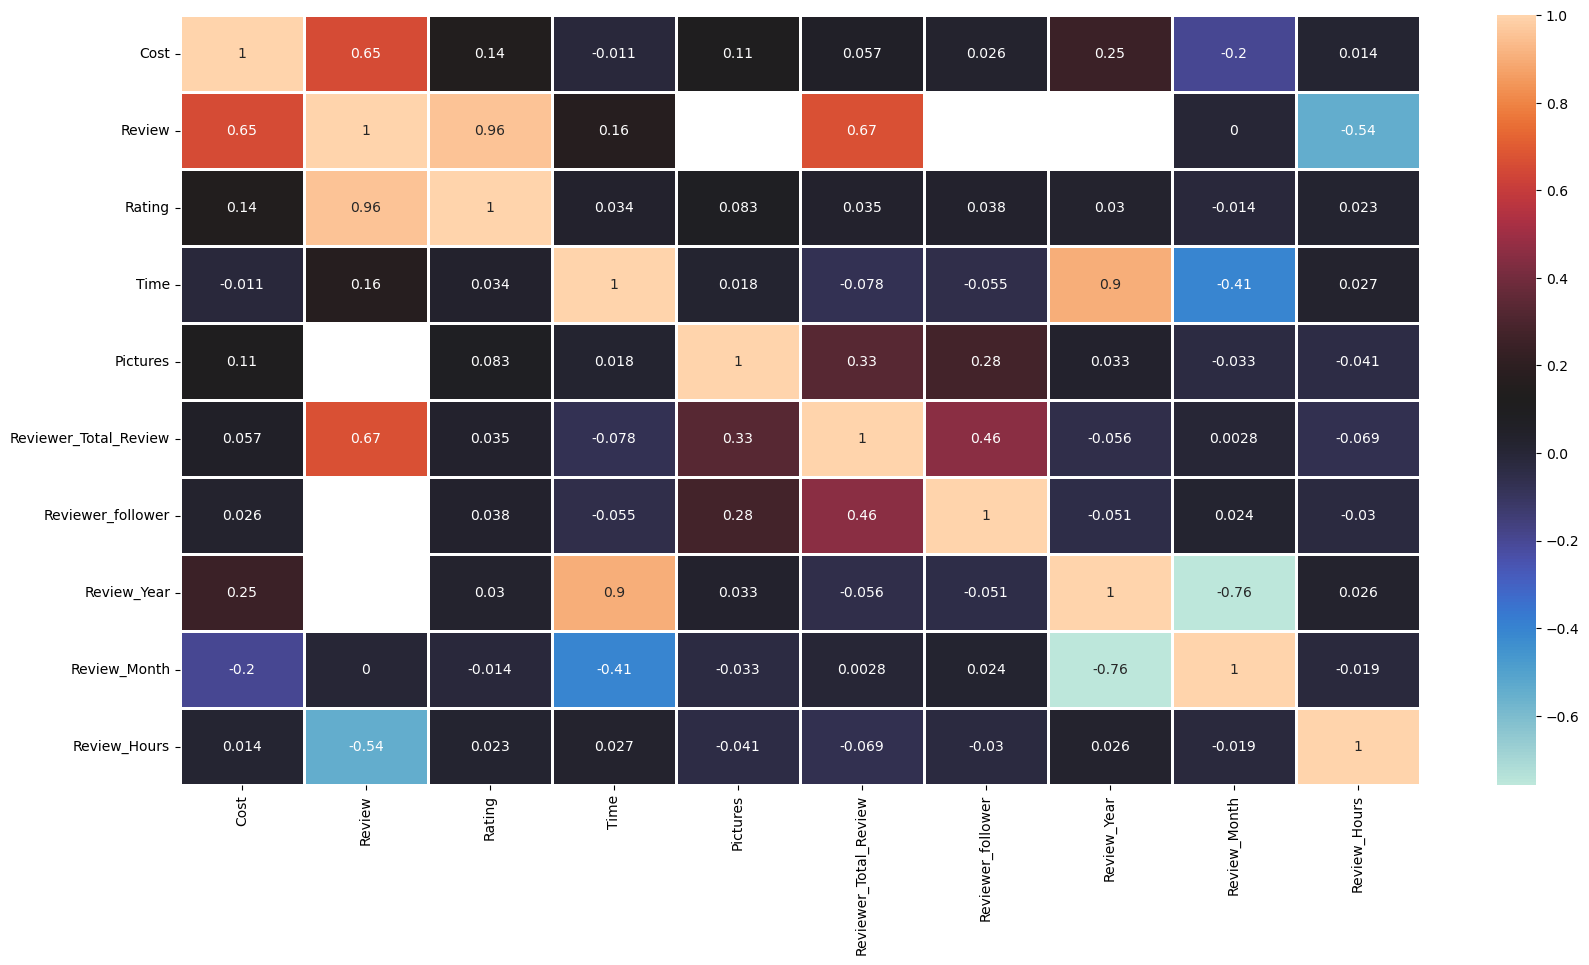

In [1773]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_numeric.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

* From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.


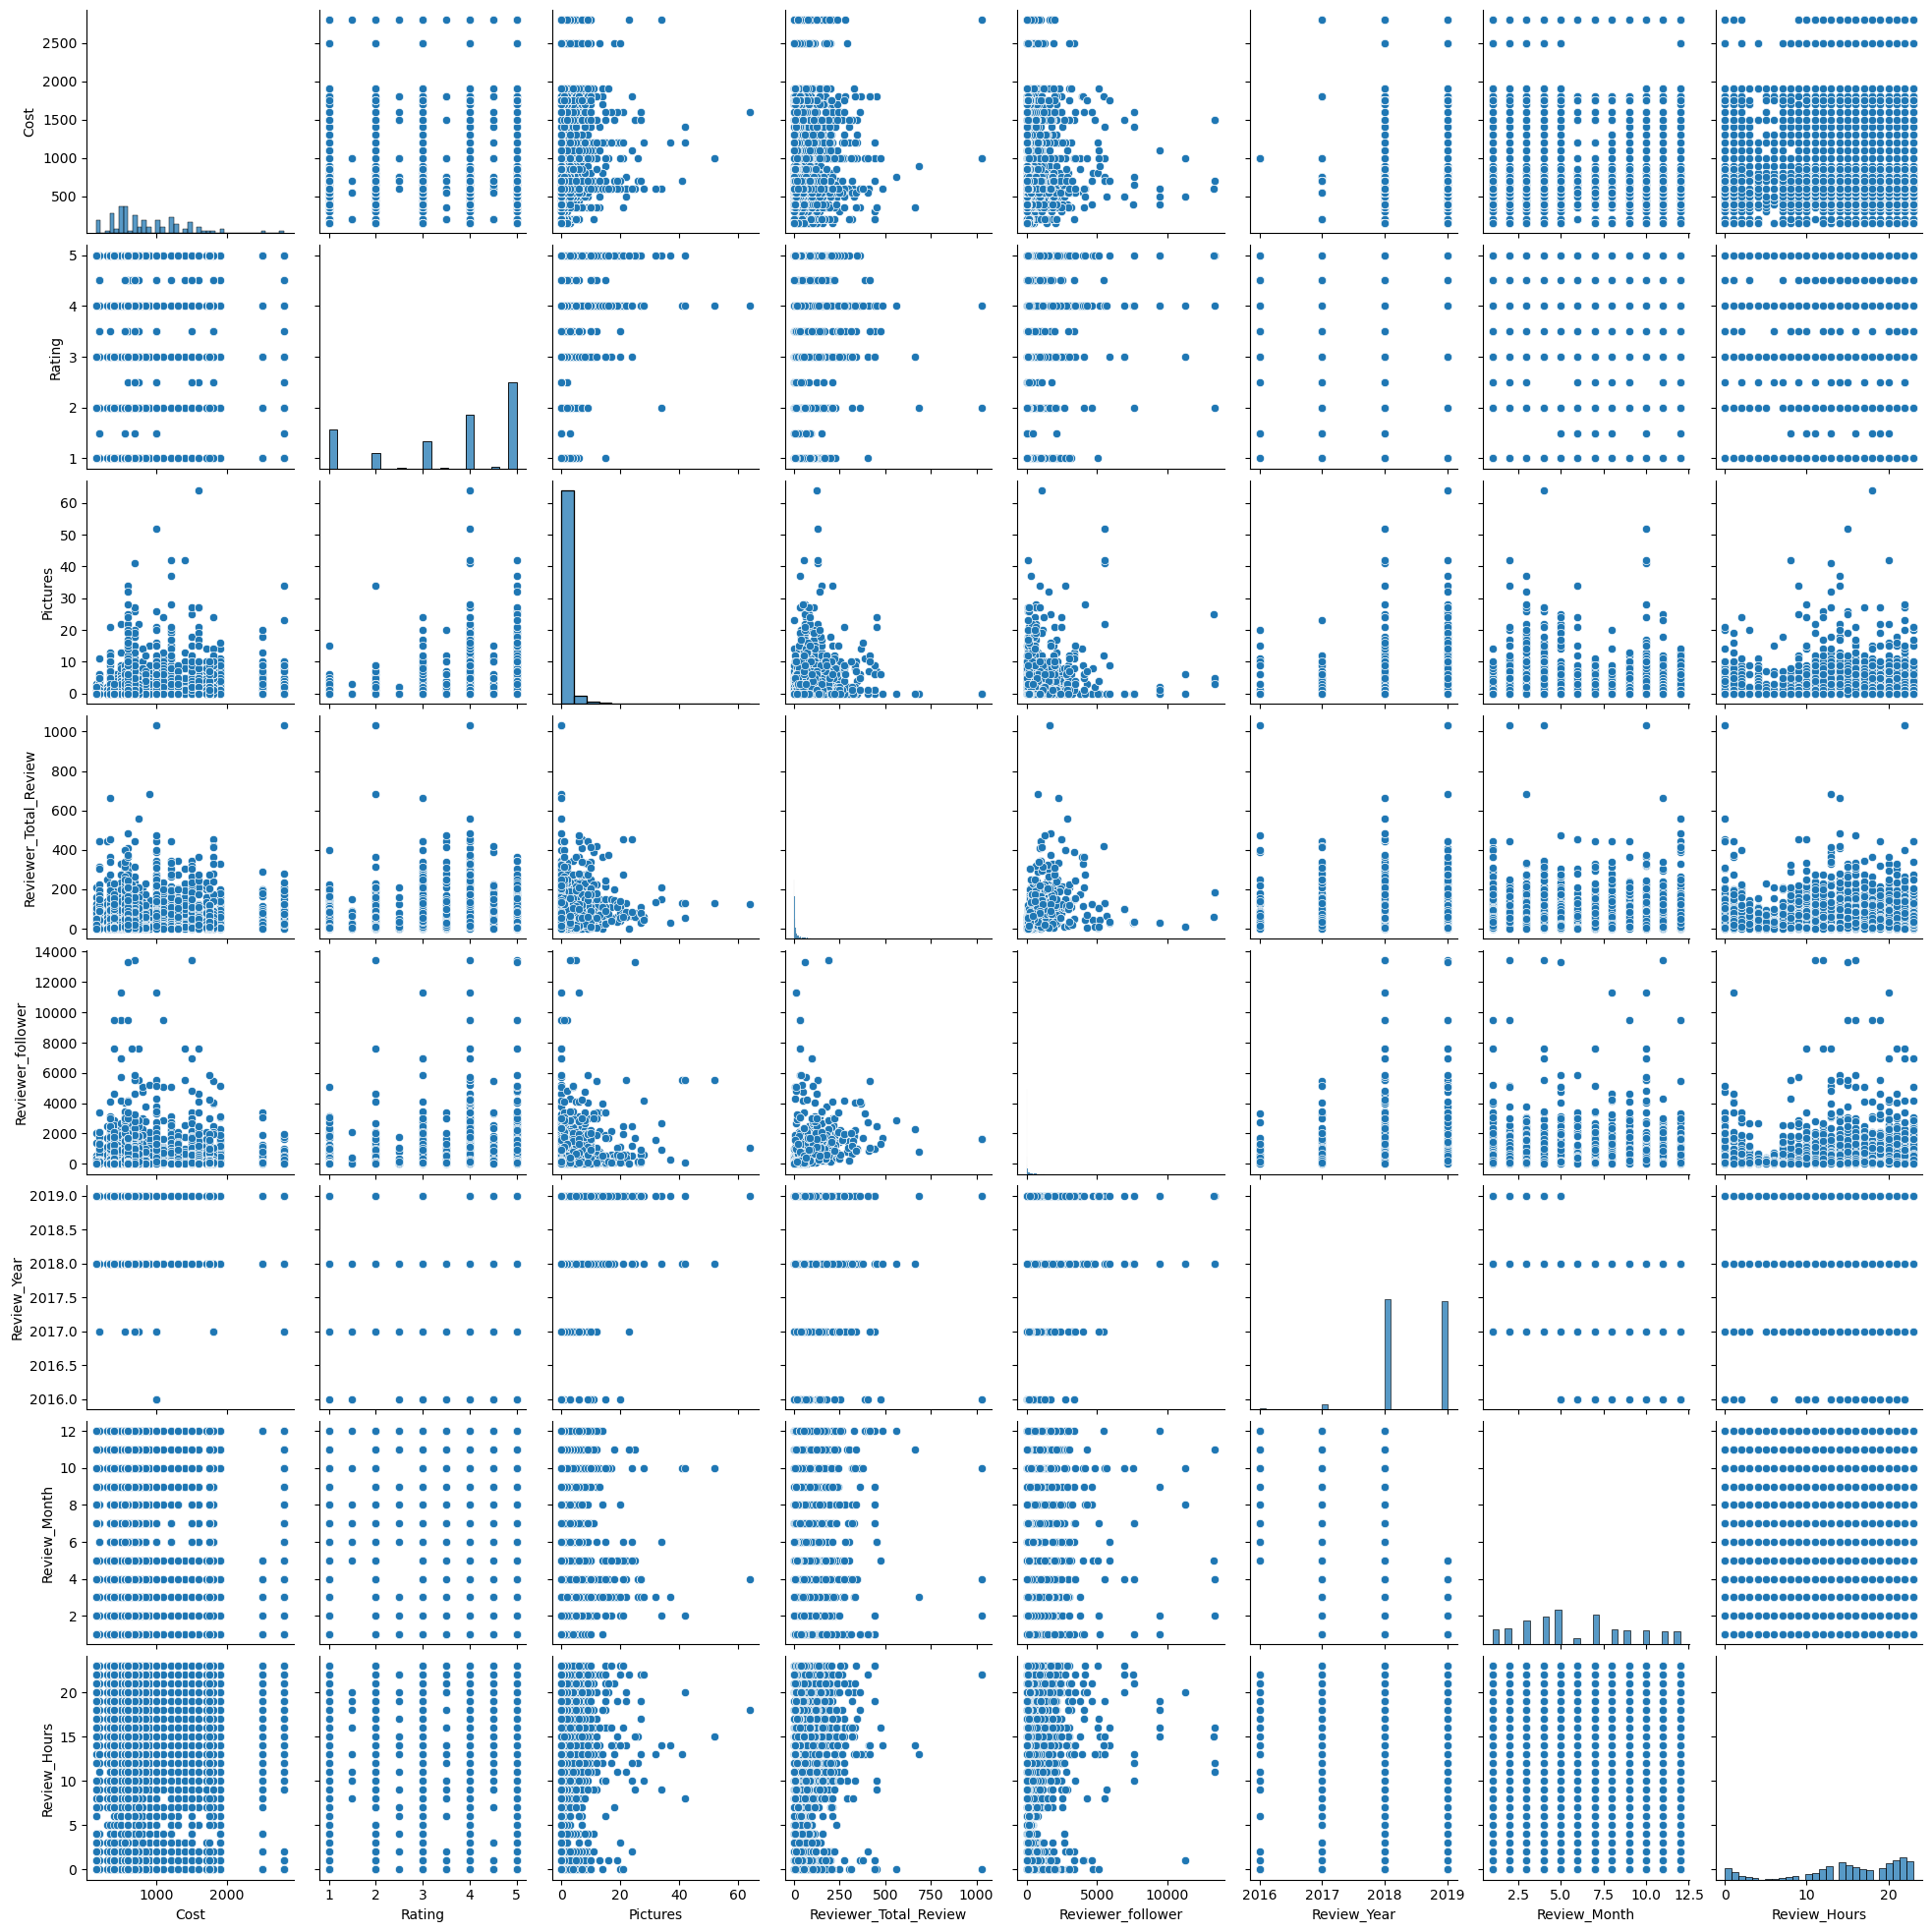

In [1775]:
sns.pairplot(merged);

* It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1 

---

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

In [1783]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

In [1787]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_follower', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_follower
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [1788]:
pd.crosstab(merged['Cuisines'], merged['Rating'])

Rating                                              1.00  1.50  2.00  2.50  \
Cuisines                                                                     
American                                               1     0     1     0   
American, Chinese, North Indian, Kebab, South I...    18     0     4     0   
American, Fast Food, Salad, Burger                    10     0     4     0   
American, Wraps, Desserts                             14     0     7     0   
Andhra, Biryani, Hyderabadi, North Indian             24     0     8     0   
...                                                  ...   ...   ...   ...   
North Indian, South Indian                            23     0     4     0   
Seafood, Goan, North Indian, Continental, Asian        5     0     5     0   
South Indian, North Indian, Chinese                   44     0    13     0   
Street Food, Arabian                                  36     0    12     0   
Street Food, North Indian, Fast Food                  24     0     6     0   

Rating                                              3.00  3.50  4.00  4.50  \
Cuisines                                                                     
American                                               2     0     8     0   
American, Chinese, North Indian, Kebab, South I...    14     0    24     0   
American, Fast Food, Salad, Burger                     6     0    15     0   
American, Wraps, Desserts                             19     0    27     0   
Andhra, Biryani, Hyderabadi, North Indian              8     0    17     0   
...                                                  ...   ...   ...   ...   
North Indian, South Indian                             6     0    10     0   
Seafood, Goan, North Indian, Continental, Asian        5     0    33     0   
South Indian, North Indian, Chinese                   26     0    48     0   
Street Food, Arabian                                   7     0     7     0   
Street Food, North Indian, Fast Food                  15     0    31     0   

Rating                                              5.00  
Cuisines                                                  
American                                              88  
American, Chinese, North Indian, Kebab, South I...    40  
American, Fast Food, Salad, Burger                    42  
American, Wraps, Desserts                             33  
Andhra, Biryani, Hyderabadi, North Indian             43  
...                                                  ...  
North Indian, South Indian                            57  
Seafood, Goan, North Indian, Continental, Asian       52  
South Indian, North Indian, Chinese                   69  
Street Food, Arabian                                  38  
Street Food, North Indian, Fast Food                  24  

[89 rows x 9 columns]

In [1789]:
from scipy.stats import chi2_contingency

# create contingency table

ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

#performing chi-squared-test
chi2, p, dof, expected = chi2_contingency(ct)

if p < 0.05:
    print('Reject Null Hypotesis')
else:
    print('Fail to reject Null Hypothesis')
    


Reject Null Hypotesis


* I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

# Feature Engineering and Data PreProcessing

In [1792]:
# since there are lots of duplicate in review data sets, so it is better to remove that data

In [1793]:
review = review.drop_duplicates()

In [1794]:
review.duplicated().sum()

0

#### **Missing_Value/Null_Value**

In [1796]:
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [1797]:
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [1798]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [1799]:
#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [1800]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [1801]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [1802]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_follower        1580
Review_Year                 2
Review_Month                2
Review_Hours                2
dtype: int64

In [1803]:
#checking null reviewer
review[review['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_follower  Review_Year  Review_Month  \
8777                    NaN                NaN          NaN           NaN   
9085                    NaN                NaN          NaN           NaN   

      Review_Hours  
8777           NaN  
9085           NaN

In [1804]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_follower  Review_Year  Review_Month  \
8777                    NaN                NaN          NaN           NaN   
9085                    NaN                NaN          NaN           NaN   

      Review_Hours  
8777           NaN  
9085           NaN

In [1805]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [1806]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_follower', 1578)]

In [1807]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_follower": 0})

In [1808]:
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_follower        0
Review_Year              0
Review_Month             0
Review_Hours             0
dtype: int64

In [1809]:
hotel.shape

(105, 5)

In [1810]:
review.shape

(9961, 12)

In [1811]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

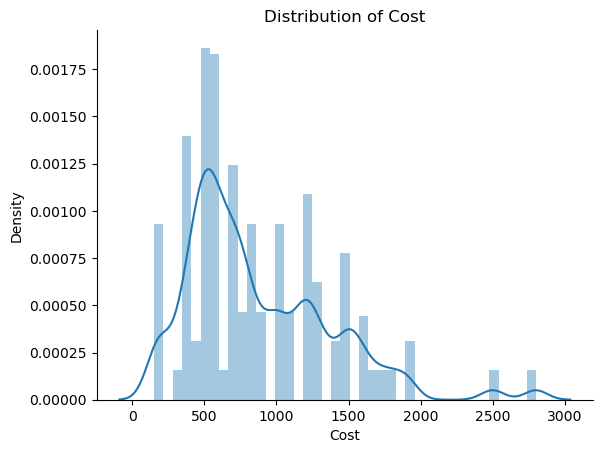

In [1812]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

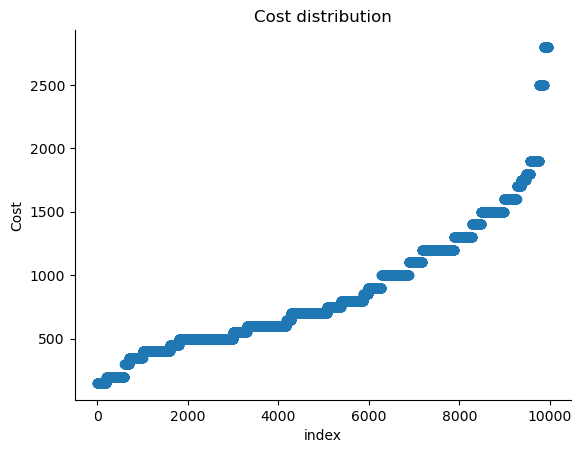

In [1813]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

<Axes: xlabel='Cost'>

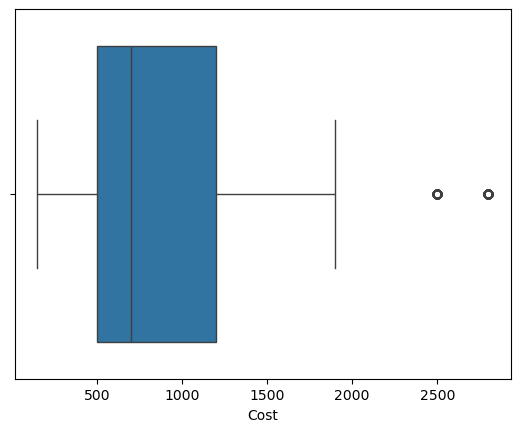

In [1814]:
sns.boxplot(merged['Cost'],orient='h')

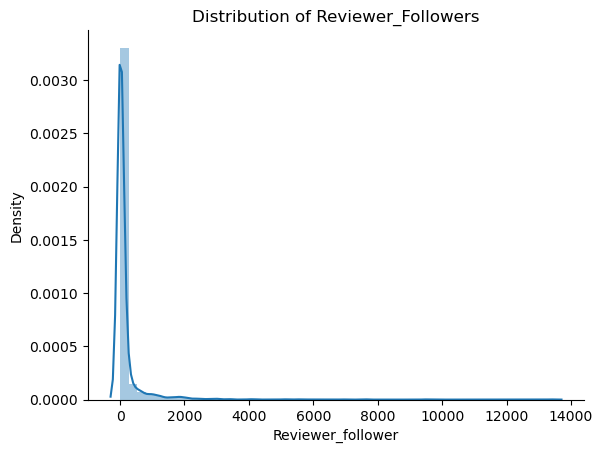

In [1815]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_follower'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

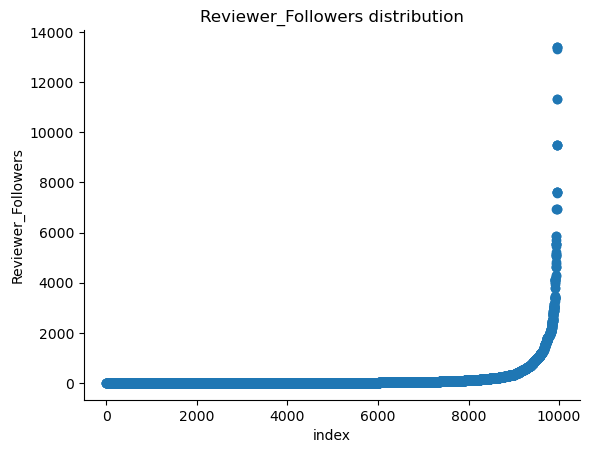

In [1816]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_follower'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

<Axes: xlabel='Reviewer_follower'>

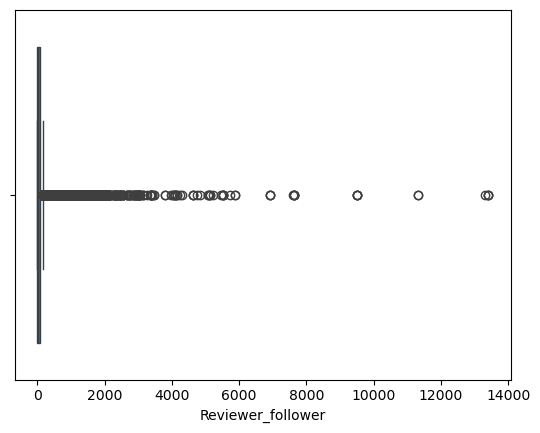

In [1817]:
sns.boxplot(merged['Reviewer_follower'],orient='h')

# Isolation Forest

In [1819]:
from sklearn.ensemble import IsolationForest
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [1820]:
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))

In [1821]:
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

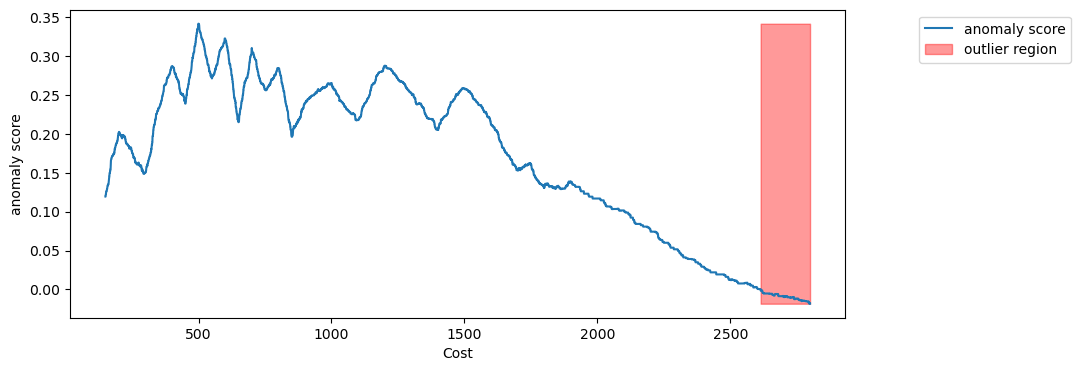

In [1822]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),where=outlier==-1, color='r',alpha=.4, label='outlier region')
plt.legend(bbox_to_anchor=(1.3,1))
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [1823]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_follower'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(merged['Reviewer_follower'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(merged['Reviewer_follower'].values.reshape(-1, 1))


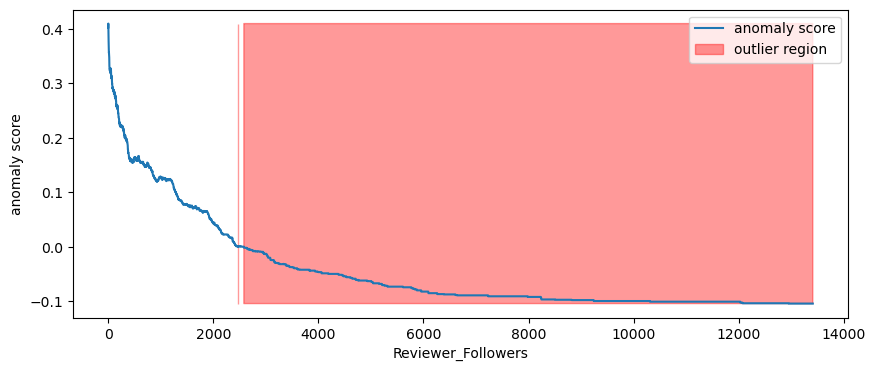

In [1824]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_follower'].min(), merged['Reviewer_follower'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [1825]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  print(abs(merged[i].mean()-merged[i].median()))
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

171.58417829535188
0.39895592811966685
0.7514305792591105
19.992069069370544
156.00843288826422
0.4520630458789583
1.0179700833249674
0.8122678445939169
0.004976646488606518
0.020078305391024953
0.03643741777169218
0.019275173175383964
Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_follower', 'Review_Year', 'Review_Month', 'Review_Hours']


In [1826]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [1827]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [1828]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_follower']<= outlier_treatment_skew(df=review,
  feature='Reviewer_follower')[1], 'Reviewer_follower']=outlier_treatment_skew(
      df=review,feature='Reviewer_follower')[1]

#upper limit capping
review.loc[review['Reviewer_follower']>= outlier_treatment_skew(df=review,
  feature='Reviewer_follower')[0], 'Reviewer_follower']=outlier_treatment_skew(
      df=review,feature='Reviewer_follower')[0]

In [1829]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

# Categorical Encoding

In [1831]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]

#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"])

cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


In [1832]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [1833]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [1834]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [1835]:
cluster_dummy

Restaurant  Cost  Average_Rating  \
0                   Beyond Flavours   800            4.28   
1                          Paradise   800            4.70   
2                          Flechazo  1300            4.66   
3    Shah Ghouse Hotel & Restaurant   800            3.21   
4        Over The Moon Brew Company  1200            4.34   
..                              ...   ...             ...   
95                       Desi Bytes   400            2.90   
96                Hyderabadi Daawat   600            3.83   
97  Zega - Sheraton Hyderabad Hotel  1750            4.45   
98                         Triptify   400            3.55   
99                 Chinese Pavilion  1000            3.75   

    Total_Cuisine_Count  American  Andhra  Arabian  Asian  BBQ  Bakery  ...  \
0                     6         0       0        0      0    0       0  ...   
1                     3         0       0        0      0    0       0  ...   
2                     4         0       0        0      1    0       0  ...   
3                     5         0       0        0      0    0       0  ...   
4                     5         0       0        0      1    0       0  ...   
..                  ...       ...     ...      ...    ...  ...     ...  ...   
95                    2         0       0        0      0    0       0  ...   
96                    3         0       0        0      0    0       0  ...   
97                    2         0       0        0      1    0       0  ...   
98                    1         0       0        0      0    0       0  ...   
99                    2         0       0        0      0    0       0  ...   

    North Indian  Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
0              1      0      0        0             1        0            0   
1              1      0      0        0             0        0            0   
2              1      0      0        0             0        0            0   
3              1      0      0        1             0        0            0   
4              1      0      0        0             0        0            0   
..           ...    ...    ...      ...           ...      ...          ...   
95             1      0      0        0             0        0            0   
96             0      0      0        0             0        0            0   
97             0      0      0        0             0        0            0   
98             1      0      0        0             0        0            0   
99             0      0      0        1             0        0            0   

    Sushi  Thai  Wraps  
0       0     0      0  
1       0     0      0  
2       0     0      0  
3       0     0      0  
4       0     0      0  
..    ...   ...    ...  
95      0     0      0  
96      0     0      0  
97      1     0      0  
98      0     0      0  
99      0     0      0  

[100 rows x 48 columns]

In [1836]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [1837]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [1838]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

# Textual Data Preprocessing - Review

In [1841]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer     Restaurant  Rating  \
7267  Kanika Rastogi        Labonel    5.00   
5058  Jayanth Majety  Gal Punjab Di    5.00   

                                                 Review  
7267  I absolutely love the Red velvet cupcakes from...  
5058  Food from this place is consistent.\n\nHave or...

In [1842]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [1843]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [1844]:
#lower Case
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [1845]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

In [1846]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [1847]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.head(5)

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  the ambience was good food was quite good  had...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...

In [1848]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [1849]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

Restaurant                                              Links  Cost  \
24        SKYHY  https://www.zomato.com/hyderabad/skyhy-gachibowli  1400   
73  Driven Cafe  https://www.zomato.com/hyderabad/driven-cafe-g...   600   

                              Cuisines  \
24  North Indian, Chinese, Continental   
73          Cafe, Fast Food, Beverages   

                                              Timings  Total_Cuisine_Count  \
24  12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon...                    3   
73                                4 AM to 12 Midnight                    3   

    Average_Rating   Location  
24            3.37  hyderabad  
73            3.75  hyderabad

#### Removing Stopwords & Removing White spaces

In [1851]:
# Remove Stopwords
# extracting the stopwords from nltk library
# nltk.download('stopwords')
sw = stopwords.words('english')

In [1852]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [1853]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [1854]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [1855]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  ambience good food quite good saturday lunch c...  
1  ambience good pleasant evening service prompt ...  
2  must try great food great ambience thnx servic...  
3  soumen das arun great guy behavior sincerety g...  
4  food goodwe ordered kodi drumsticks basket mut...

#### Tokenization

In [1857]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/divyansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1858]:
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [1859]:
#applying Lemmatization
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

In [1860]:
sentiment_df.head(5)

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  [ambience, good, food, quite, good, saturday, ...  
1  [ambience, good, pleasant, evening, service, p...  
2  [must, try, great, food, great, ambience, thnx...  
3  [soumen, da, arun, great, guy, behavior, since...  
4  [food, goodwe, ordered, kodi, drumstick, baske...

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.
I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the 

**Other Method for Normalization**

---
Tokenization is the process of breaking down a sentence or a piece of text into individual words or tokens. Tokenization is an important step in natural language processing as it allows us to work with individual words rather than the entire text.

Stemming is the process of reducing words to their base or root form. This is useful in natural language processing because it allows us to reduce the dimensionality of the data by converting words to their common form. This can help improve the performance of models by reducing the number of unique words that need to be processed.

Stemming can be used because they are common normalization techniques used in natural language processing to preprocess text data before it is fed into a model. Tokenization is the first step and it breaks down the text into individual words, which is necessary for most NLP tasks. Stemming is used to reduce the dimensionality of the data by converting words to their common form, this is useful for text classification and other NLP tasks where the meaning of the words is important.

⚡In general, stemming is a more aggressive technique that can remove more of the original word form, which may make it difficult for a lemmatizer to accurately identify the base form of the word. Additionally, some stemming algorithms may create non-real words, which are difficult for a lemmatizer to handle.
Therefore, if the goal is to maintain the meaning of the text and preserve more of the original word forms, it would be more appropriate to apply lemmatization before stemming. However, if the goal is to reduce all words to their base forms and to group together different forms of the same word, it may be useful to try both ways and compare the results.

####  Text Vectorization

**Tfidf**

---

In [1865]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)



---

**Bag of Words**

In [1867]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
#tokens_dict.token2id

In [1868]:
tokens_dict.token2id

{'also': 0,
 'ambience': 1,
 'brunch': 2,
 'chill': 3,
 'cost': 4,
 'courteous': 5,
 'da': 6,
 'effective': 7,
 'food': 8,
 'friend': 9,
 'good': 10,
 'helpful': 11,
 'lunch': 12,
 'one': 13,
 'parent': 14,
 'place': 15,
 'quite': 16,
 'really': 17,
 'sate': 18,
 'saturday': 19,
 'soumen': 20,
 'waiter': 21,
 'evening': 22,
 'experience': 23,
 'kudos': 24,
 'pleasant': 25,
 'prompt': 26,
 'service': 27,
 'alfredo': 28,
 'amazing': 29,
 'background': 30,
 'great': 31,
 'music': 32,
 'must': 33,
 'pasta': 34,
 'penne': 35,
 'personal': 36,
 'pradeep': 37,
 'recommendation': 38,
 'subroto': 39,
 'thnx': 40,
 'try': 41,
 'arun': 42,
 'behavior': 43,
 'course': 44,
 'guy': 45,
 'like': 46,
 'sincerety': 47,
 'visit': 48,
 'would': 49,
 'basket': 50,
 'biryani': 51,
 'drumstick': 52,
 'enjoyed': 53,
 'goodwe': 54,
 'kodi': 55,
 'mutton': 56,
 'ordered': 57,
 'served': 58,
 'thanks': 59,
 'well': 60,
 'ambiance': 61,
 'apradeecp': 62,
 'best': 63,
 'caption': 64,
 'hostess': 65,
 'papiya': 66

In [1869]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

In [1870]:
#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

#### Feature Engineering

In [1873]:
hotel['Location']

0     hyderabad
1     hyderabad
2     hyderabad
3     hyderabad
4     hyderabad
        ...    
95    hyderabad
96    hyderabad
97    hyderabad
98    hyderabad
99    hyderabad
Name: Location, Length: 100, dtype: object

**here 99% location has hydrabad so no point of taking this column along with link**

In [1875]:
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [1876]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [1877]:
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [1878]:
cluster_df.shape

(100, 47)

In [1879]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_follower', 'Review_Year',
       'Review_Month', 'Review_Hours'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [1881]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [1882]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  Sentiment  
0  [ambience, good, food, quite, good, saturday, ...          1  
1  [ambience, good, pleasant, evening, service, p...          1  
2  [must, try, great, food, great, ambience, thnx...          1  
3  [soumen, da, arun, great, guy, behavior, since...          1  
4  [food, goodwe, ordered, kodi, drumstick, baske...          1

#### Feature Selection

In [1884]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [1885]:
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [1886]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [1887]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_follower', 'Review_Year',
       'Review_Month', 'Review_Hours'],
      dtype='object')

In [1888]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

#### Data Transformation

(array([10., 23., 21.,  9.,  9., 13.,  8.,  3.,  2.,  2.]),
 array([ 150.,  360.,  570.,  780.,  990., 1200., 1410., 1620., 1830.,
        2040., 2250.]),
 <BarContainer object of 10 artists>)

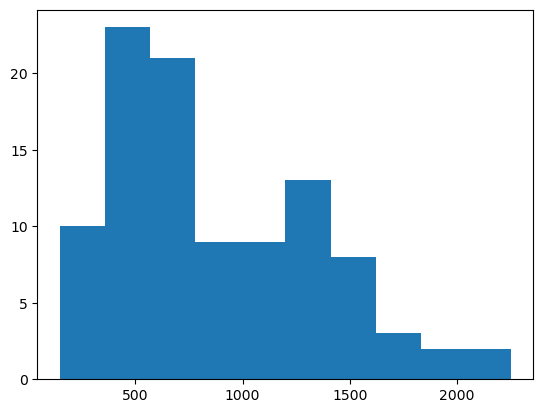

In [1890]:
plt.hist(cluster_df['Cost'])

(array([4.76190476e-04, 1.09523810e-03, 1.00000000e-03, 4.28571429e-04,
        4.28571429e-04, 6.19047619e-04, 3.80952381e-04, 1.42857143e-04,
        9.52380952e-05, 9.52380952e-05]),
 array([ 150.,  360.,  570.,  780.,  990., 1200., 1410., 1620., 1830.,
        2040., 2250.]),
 <BarContainer object of 10 artists>)

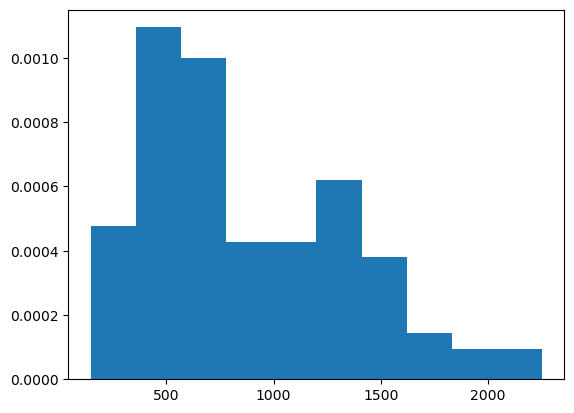

In [1891]:
plt.hist(cluster_dummy['Cost'], density = True)

In [1892]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

(array([0.07402335, 0.14804671, 0.03701168, 0.33310509, 0.62919851,
        0.77724522, 0.33310509, 0.74023354, 0.40712845, 0.22207006]),
 array([5.01727984, 5.28746484, 5.55764984, 5.82783484, 6.09801984,
        6.36820484, 6.63838984, 6.90857484, 7.17875984, 7.44894484,
        7.71912984]),
 <BarContainer object of 10 artists>)

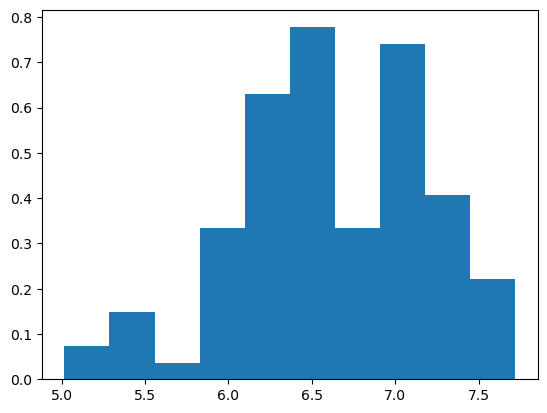

In [1893]:
plt.hist(cluster_df['Cost'], density = True)

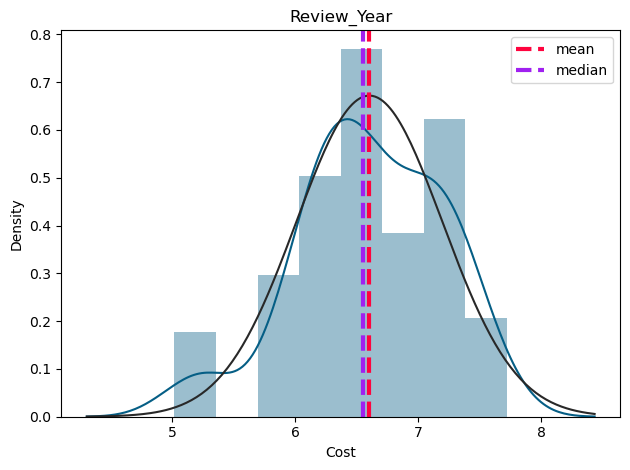

In [1894]:
sns.distplot(cluster_df['Cost'], color = '#055E85', fit = norm);
feature = cluster_df['Cost']
plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1))
plt.title(f'{col.title()}');
plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

#### Data Scaling

In [1897]:
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

#### Dimensionality Reduction

In [1899]:
scaled_df.set_index(['Restaurant'],inplace=True)

In [1900]:
pca = PCA()

In [1901]:
feature = scaled_df.columns
pca.fit(scaled_df[feature])

PCA()

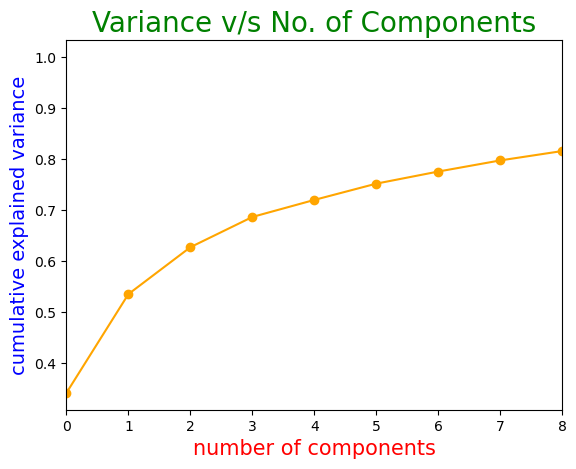

In [1902]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [1903]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[feature])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[feature])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.

When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.

# Data Spliting

In [1906]:

# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [1907]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17327)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17327)
Number transactions y_test dataset:  (1993,)


# Model Implementation

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [1910]:
# pip install threadpoolctl==3.1.0

In [1911]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [1912]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

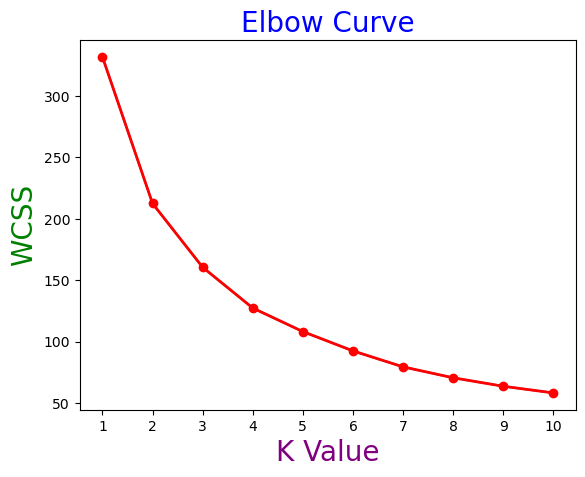

In [1913]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.3135749171591742
For n_clusters = 3 average silhouette_score is : 0.29742119718061033
For n_clusters = 4 average silhouette_score is : 0.3127440012825435
For n_clusters = 5 average silhouette_score is : 0.30244427842780724
For n_clusters = 6 average silhouette_score is : 0.31674800026101824
For n_clusters = 7 average silhouette_score is : 0.309654744188891
For n_clusters = 8 average silhouette_score is : 0.2977807247271479
For n_clusters = 9 average silhouette_score is : 0.2995719985058815


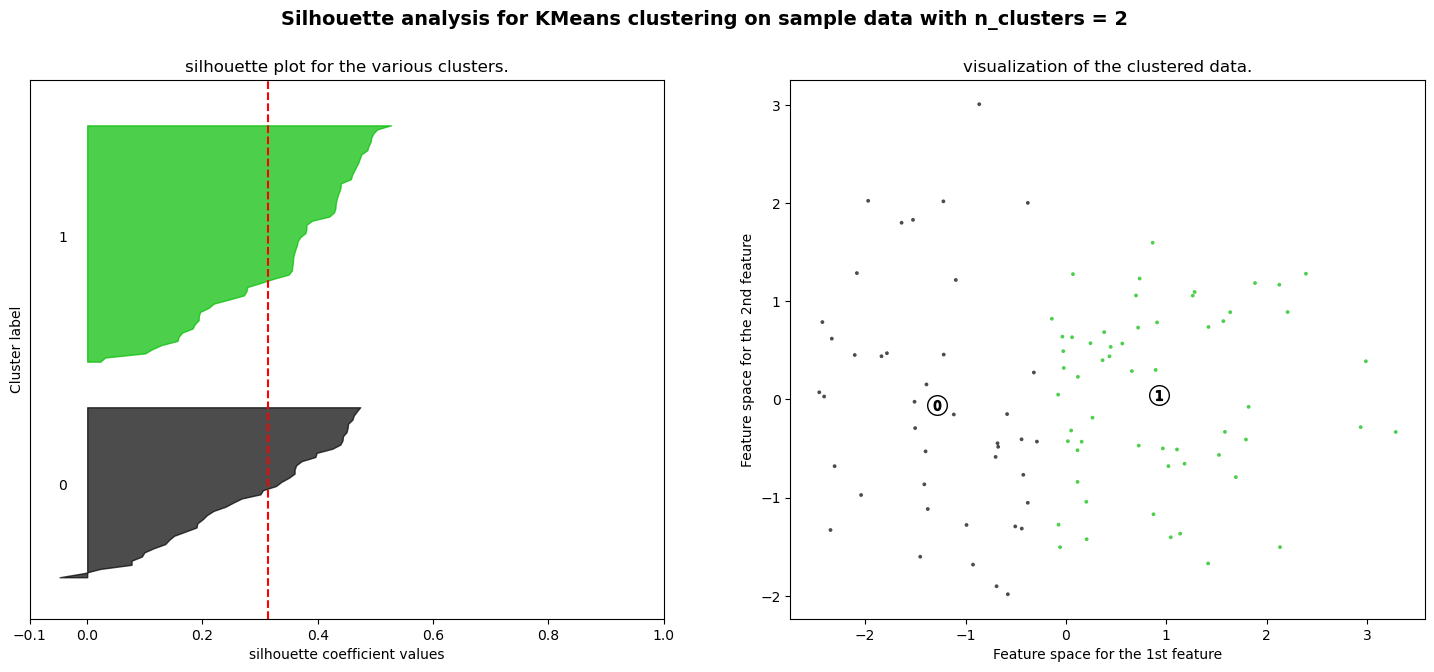

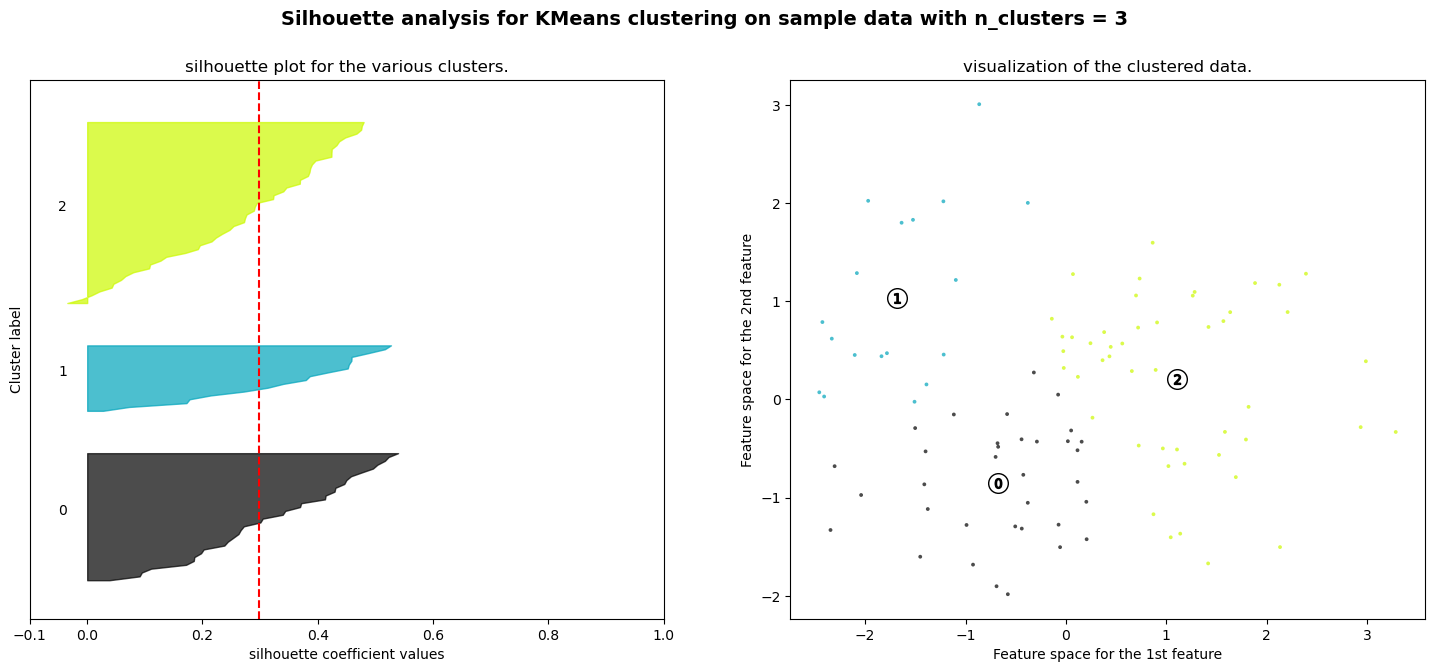

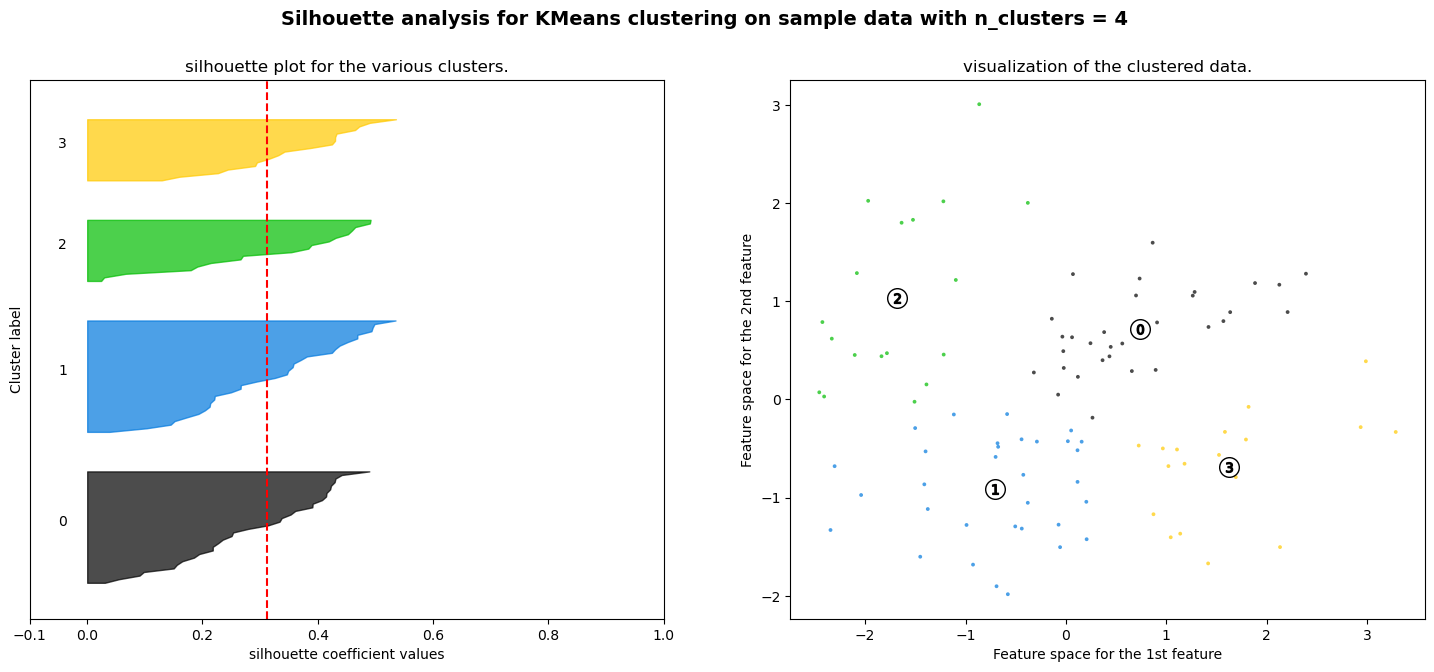

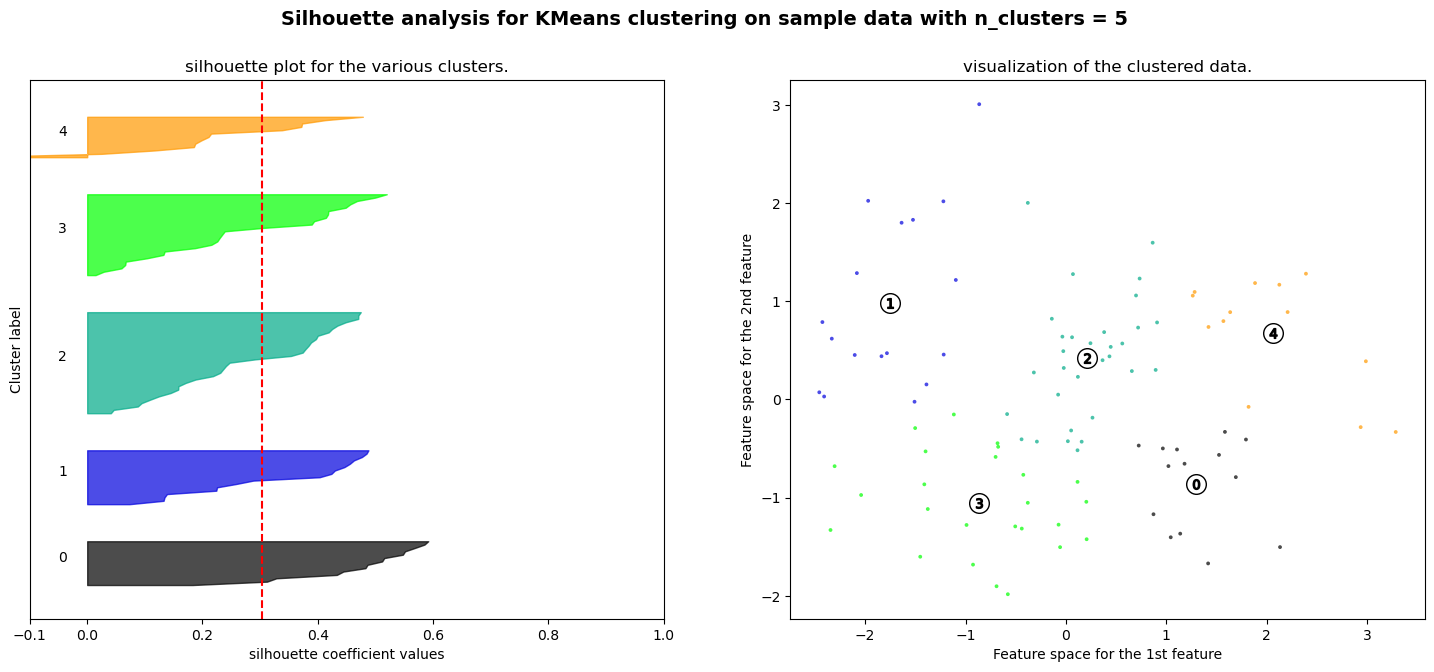

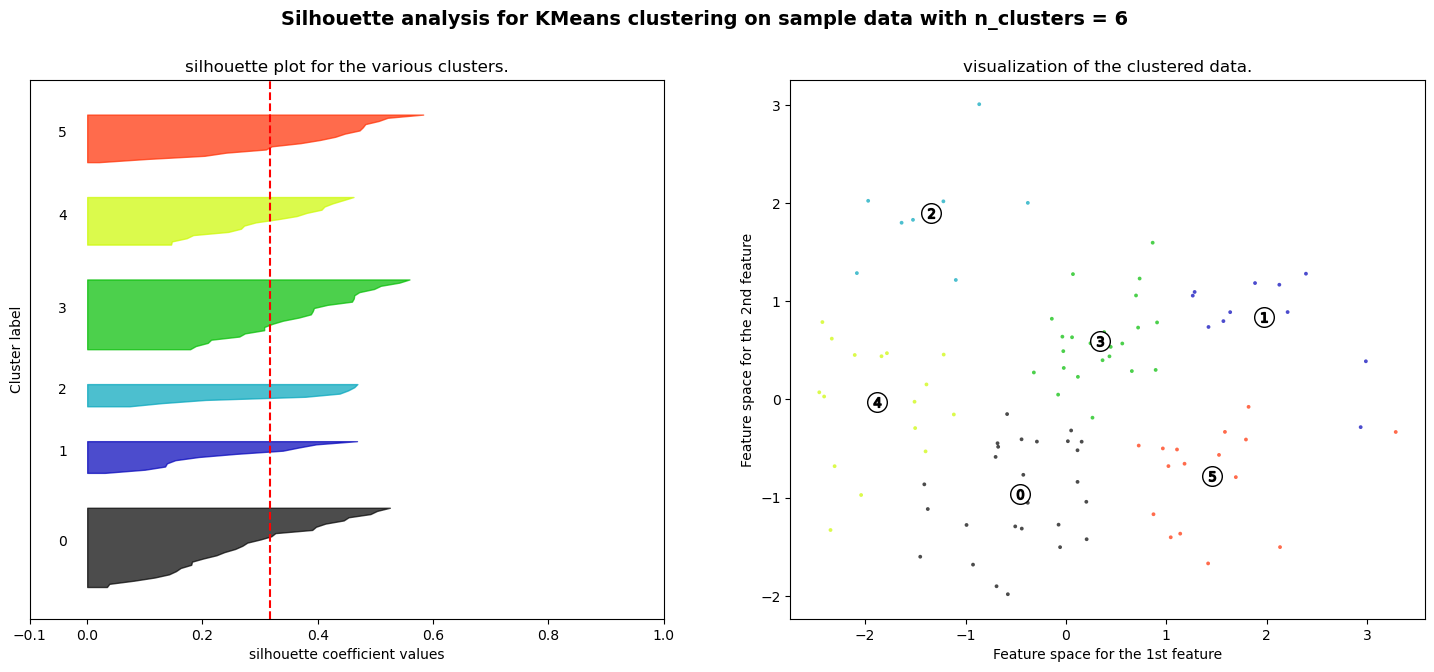

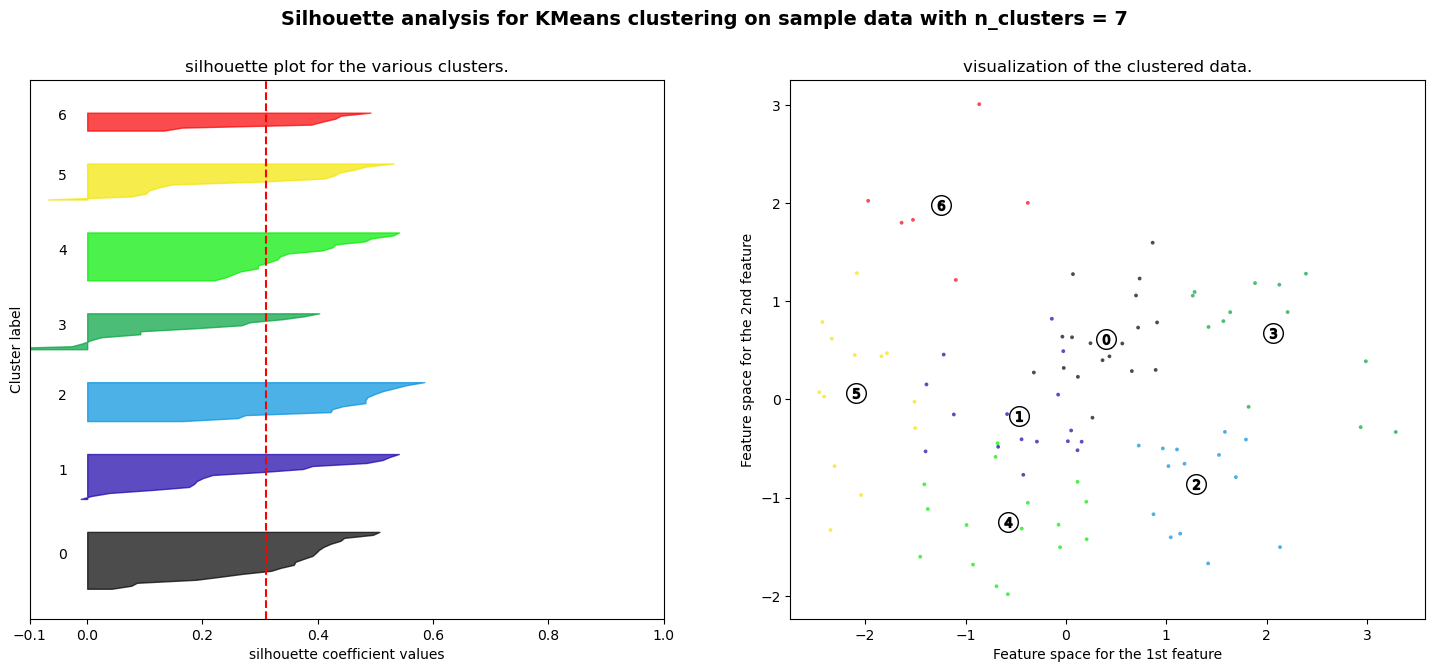

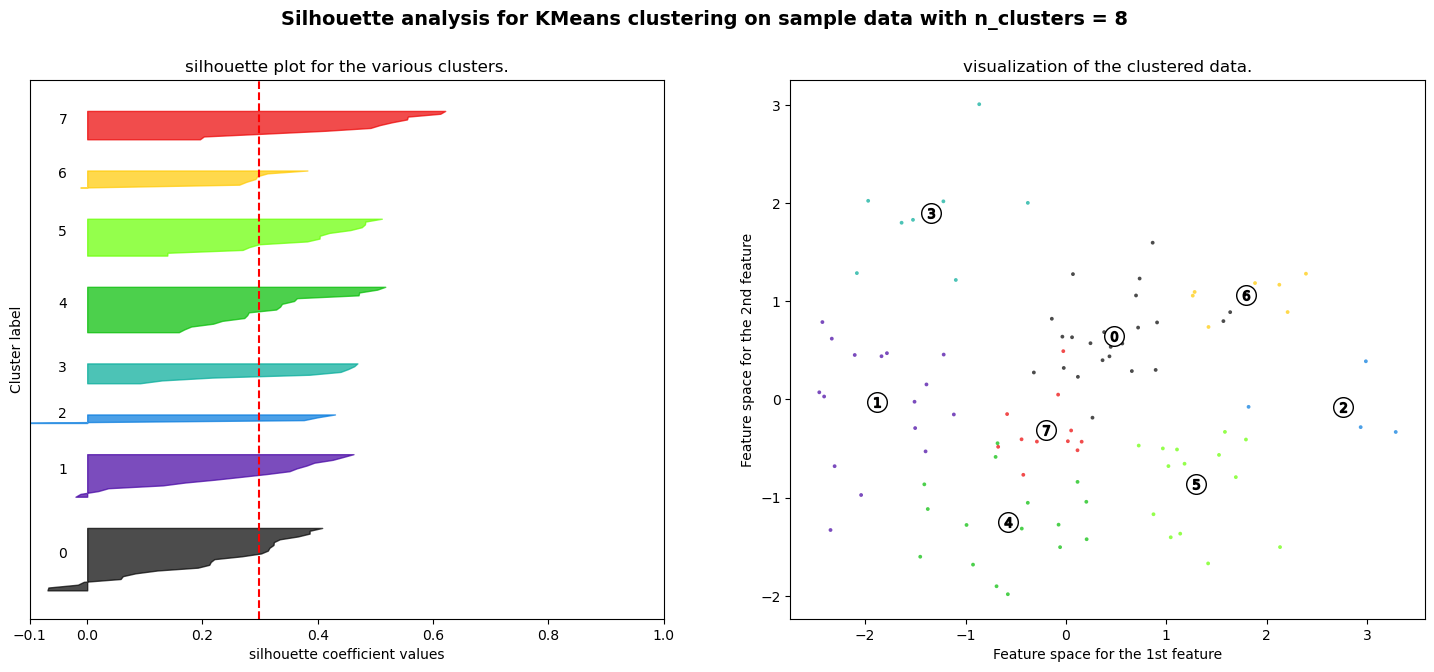

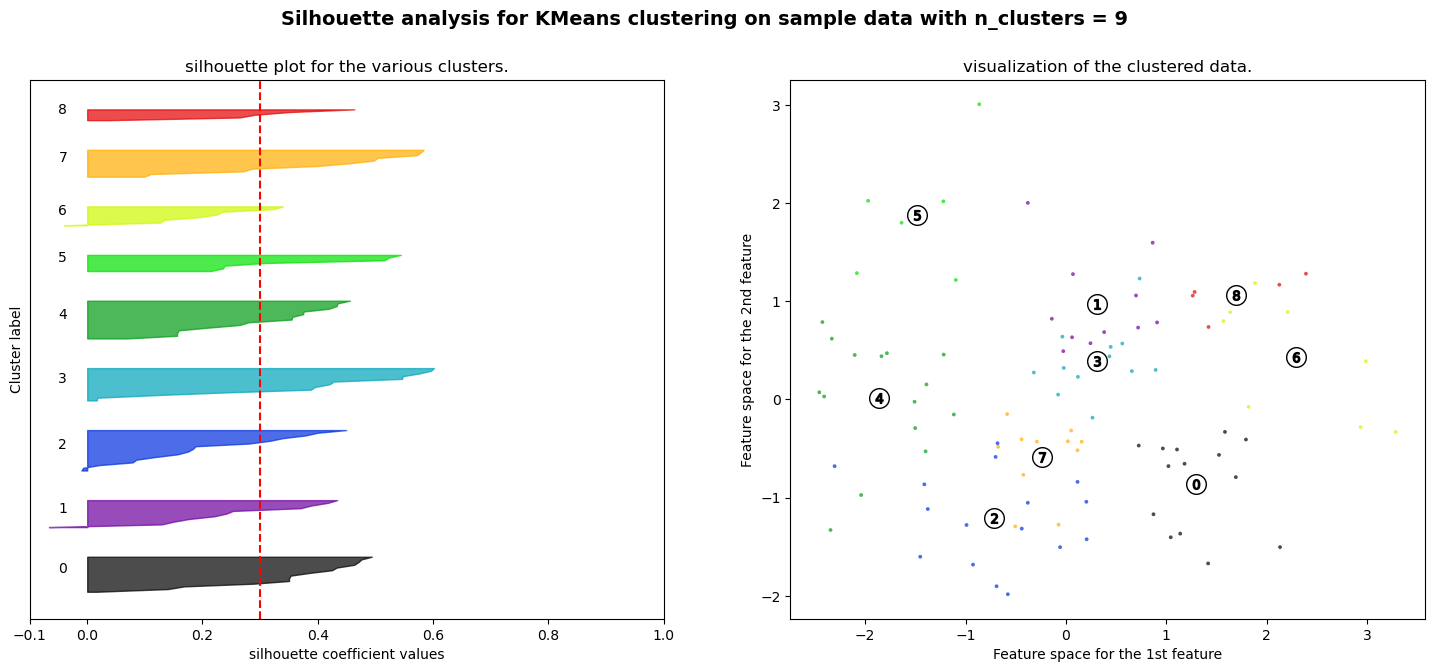

In [1914]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

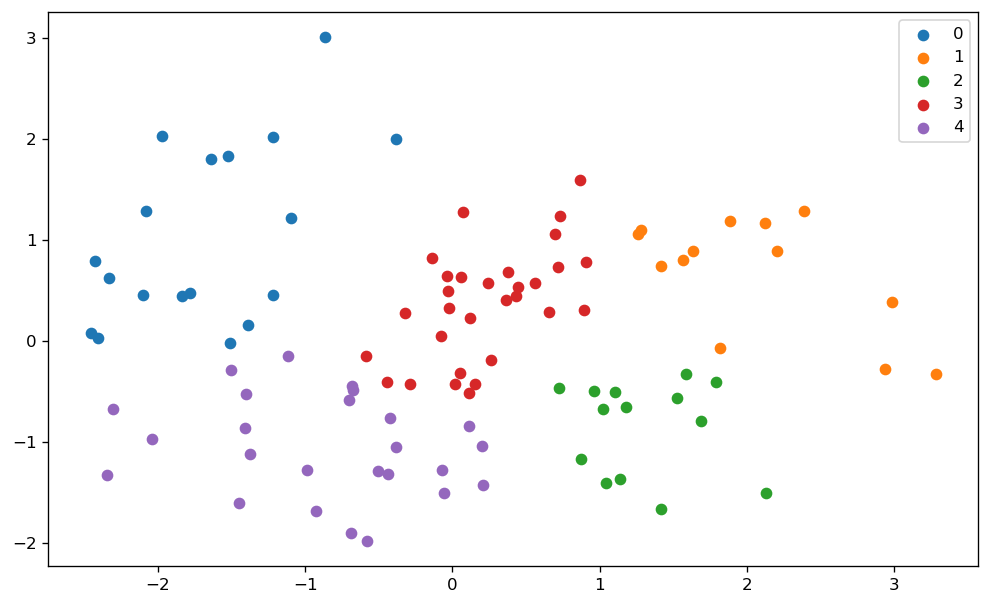

In [1915]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [1916]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1   PC2  PC3  label
Restaurant                              
Tempteys          1.26  1.06 0.82      1
Biryanis And More 0.26 -0.19 0.53      3

In [1917]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.head()

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                                  
Beyond Flavours                 6.69            4.28                    6   
Paradise                        6.69            4.70                    3   
Flechazo                        7.17            4.66                    4   
Shah Ghouse Hotel & Restaurant  6.69            3.21                    5   
Over The Moon Brew Company      7.09            4.34                    5   

                                American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                      
Beyond Flavours                        0       0        0      0    0       0   
Paradise                               0       0        0      0    0       0   
Flechazo                               0       0        0      1    0       0   
Shah Ghouse Hotel & Restaurant         0       0        0      0    0       0   
Over The Moon Brew Company             0       0        0      1    0       0   

                                Beverages  ...  Pizza  Salad  Seafood  \
Restaurant                                 ...                          
Beyond Flavours                         0  ...      0      0        0   
Paradise                                0  ...      0      0        0   
Flechazo                                0  ...      0      0        0   
Shah Ghouse Hotel & Restaurant          1  ...      0      0        1   
Over The Moon Brew Company              0  ...      0      0        0   

                                South Indian  Spanish  Street Food  Sushi  \
Restaurant                                                                  
Beyond Flavours                            1        0            0      0   
Paradise                                   0        0            0      0   
Flechazo                                   0        0            0      0   
Shah Ghouse Hotel & Restaurant             0        0            0      0   
Over The Moon Brew Company                 0        0            0      0   

                                Thai  Wraps  label  
Restaurant                                          
Beyond Flavours                    0      0      4  
Paradise                           0      0      0  
Flechazo                           0      0      0  
Shah Ghouse Hotel & Restaurant     0      0      4  
Over The Moon Brew Company         0      0      0  

[5 rows x 48 columns]

In [1918]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                  
eat.fit             500.00            3.20                    4         0   
Mohammedia Shawarma 150.00            2.99                    2         0   

                     Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                           ...   
eat.fit                   0        0      0    0       0          0  ...   
Mohammedia Shawarma       0        1      0    0       0          0  ...   

                     Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                          
eat.fit                  0      0        0             1        0   
Mohammedia Shawarma      0      0        0             0        0   

                     Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                   
eat.fit                        0      0     0      0      4  
Mohammedia Shawarma            1      0     0      0      1  

[2 rows x 48 columns]

In [1919]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...  800.00            4.28   
1                     Biryani, North Indian, Chinese  800.00            4.70   
2       Asian, Mediterranean, North Indian, Desserts 1300.00            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...  800.00            3.21   
4  Asian, Continental, North Indian, Chinese, Med... 1200.00            4.34   

   Total_Cuisine_Count  label  
0                    6      4  
1                    3      0  
2                    4      0  
3                    5      4  
4                    5      0

In [1920]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

label  Total_Restaurant
4      1                13
3      2                14
2      0                18
1      4                25
0      3                30

In [1921]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
41   Karachi Bakery     Fast Food  500.00            3.80   
11  Barbeque Nation  North Indian 1600.00            4.12   
66     Aromas@11SIX  North Indian  750.00            3.46   
15              KFC     Fast Food  500.00            2.85   
45      Owm Nom Nom  North Indian  900.00            3.29   

    Total_Cuisine_Count  label  
41                    3      3  
11                    4      0  
66                    4      4  
15                    2      2  
45                    4      4

In [1922]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

#### Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering** 
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

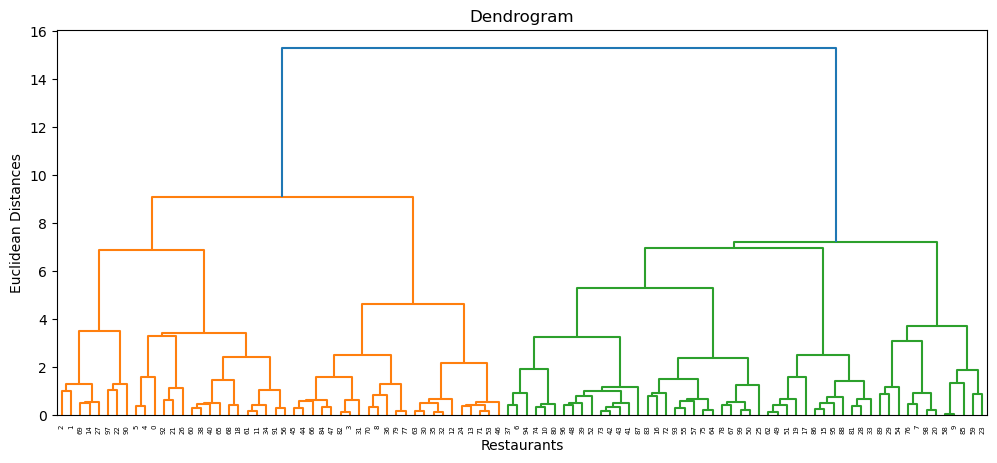

In [1925]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [1926]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2956641953323888
For n_clusters = 3, silhouette score is 0.2252839885668054
For n_clusters = 4, silhouette score is 0.2086572967568053
For n_clusters = 5, silhouette score is 0.2466524590302819
For n_clusters = 6, silhouette score is 0.27119012773344164
For n_clusters = 7, silhouette score is 0.2686110893537918
For n_clusters = 8, silhouette score is 0.28150770224086563
For n_clusters = 9, silhouette score is 0.28803642781491295
For n_clusters = 10, silhouette score is 0.2885450432372219
For n_clusters = 11, silhouette score is 0.2995283823321347
For n_clusters = 12, silhouette score is 0.31428857933967697
For n_clusters = 13, silhouette score is 0.3158360423442036
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.33655269068108956


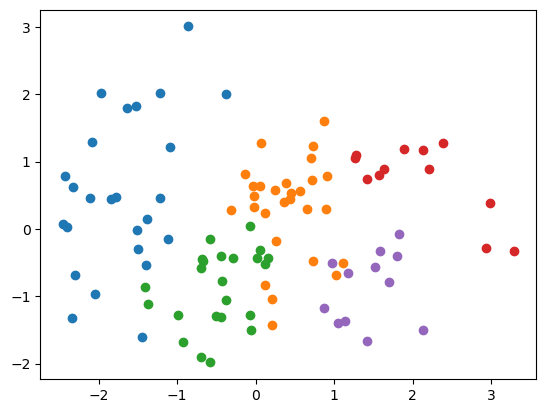

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [1927]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [1928]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [1929]:
clustering_result.sample(5)

Restaurant  \
56     Feast - Sheraton Hyderabad Hotel   
36  Banana Leaf Multicuisine Restaurant   
66                         Aromas@11SIX   
75               Royal Spicy Restaurant   
57                         Being Hungry   

                                             Cuisines    Cost  Average_Rating  \
56         Modern Indian, Asian, Continental, Italian 2250.00            4.22   
36  Biryani, South Indian, North Indian, Chinese, ...  700.00            3.69   
66            North Indian, Chinese, Mughlai, Biryani  750.00            3.46   
75                         North Indian, South Indian  700.00            3.74   
57                              North Indian, Chinese  450.00            3.66   

    Total_Cuisine_Count  label  label_hr  
56                    4      0         0  
36                    5      4         2  
66                    4      4         2  
75                    2      3         1  
57                    2      3         1

⚡ **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

### ML Model - 2 Sentiment Analysis

**LDA**

In [1933]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


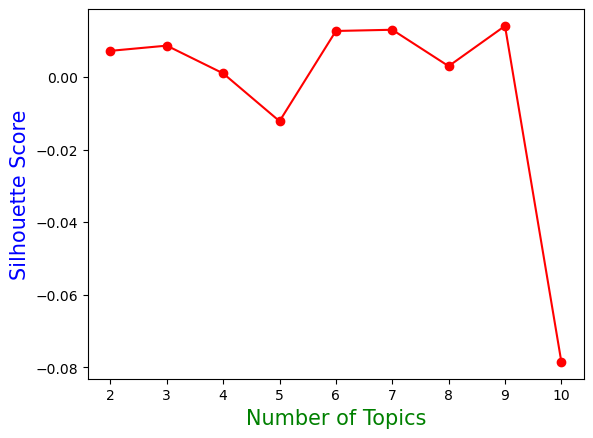

In [1934]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [1935]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [1936]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [1937]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

Restaurant               Reviewer  \
948              Cream Stone          Samreen Rizvi   
7502  Royal Spicy Restaurant                 Vishnu   
193                 Paradise  Raj Mondal Raj Mondal   
8554           Momos Delight         Bikalpa Pandey   
71           Beyond Flavours          Rashmi Prasad   

                                                 Review  Rating  \
948   The more you have the more you crave. One of t...    5.00   
7502  I have ordered tangdi kabab, I think being lat...    1.00   
193   Good service and all food very good taste........    5.00   
8554  the momo was smelling and tasting really bad.....    1.00   
71    Ahmed was a great help in beyond flavour... He...    5.00   

                       Metadata                Time  Pictures  Prediction  
948   10 Reviews , 17 Followers 2019-01-12 14:53:00         1           2  
7502                   1 Review 2019-04-22 19:17:00         0           2  
193       1 Review , 1 Follower 2019-05-11 03:18:00         0           3  
8554  39 Reviews , 23 Followers 2018-07-28 22:53:00         0           2  
71        1 Review , 1 Follower 2019-05-14 22:58:00         0           2

TOP 100 WORDS FOR TOPIC #0


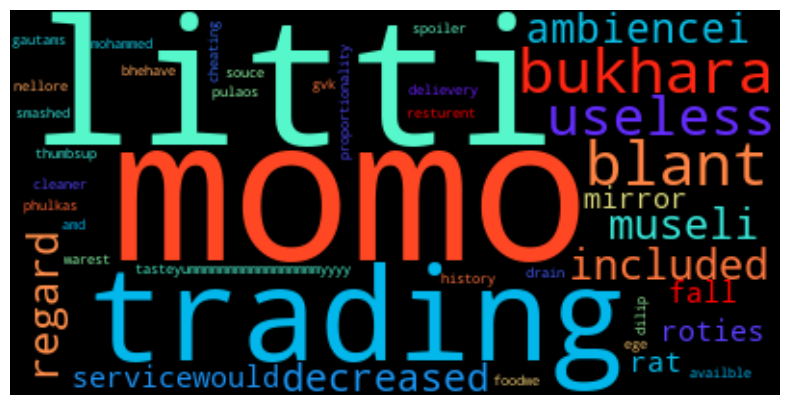

TOP 100 WORDS FOR TOPIC #1


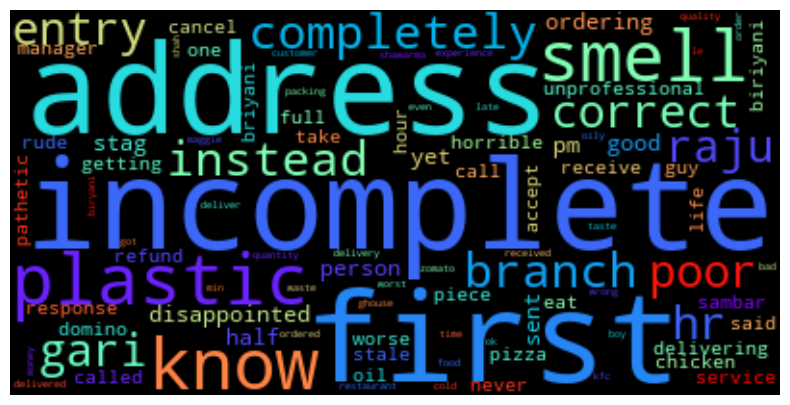

TOP 100 WORDS FOR TOPIC #2


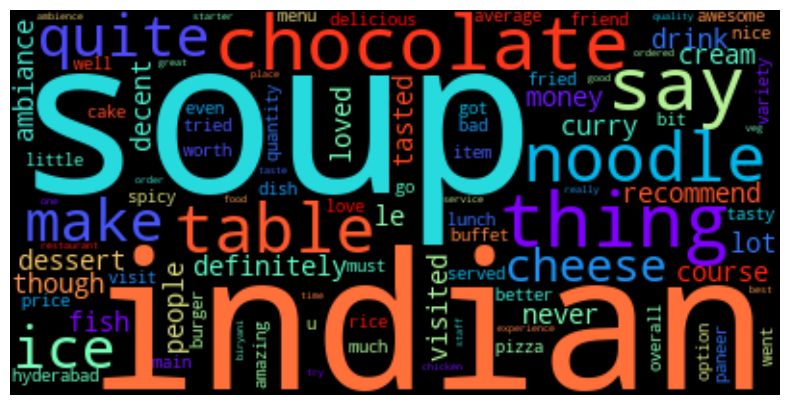

TOP 100 WORDS FOR TOPIC #3


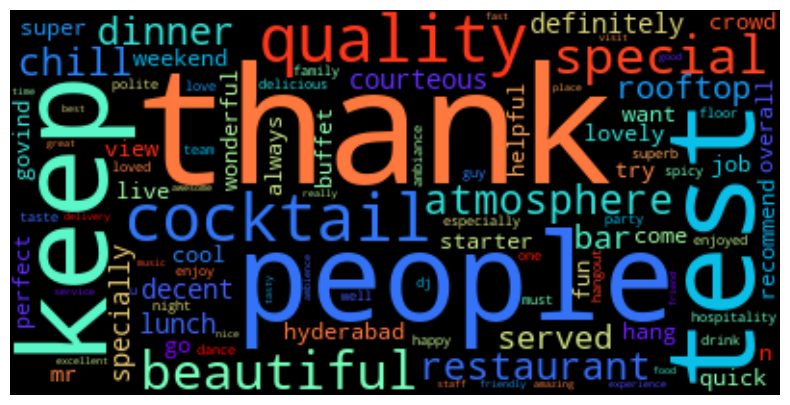

In [1938]:
#worcloud 
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [1939]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == 
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  2 

5.00    2041
4.00    1979
1.00    1324
3.00    1035
2.00     589
4.50      67
3.50      46
2.50      16
1.50       9
Name: Rating, dtype: int64
Prediction =  3 

5.00    1645
4.00     333
3.00      85
1.00      57
2.00      33
2.50       2
4.50       2
3.50       1
Name: Rating, dtype: int64
Prediction =  1 

1.00    317
5.00     90
3.00     57
2.00     52
4.00     47
2.50      1
Name: Rating, dtype: int64
Prediction =  0 

5.00    56
1.00    37
3.00    16
4.00    14
2.00    10
Name: Rating, dtype: int64


In [1940]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [1942]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

**XgBoost**

In [1944]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

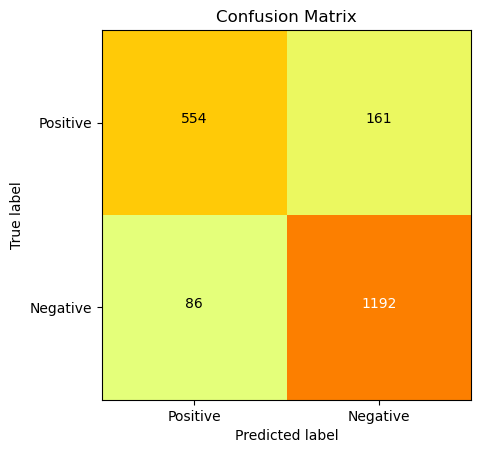

[[ 554  161]
 [  86 1192]]
Metric        Score
---------  --------
ROC AUC    0.853766
Precision  0.881005
Recall     0.932707
F1         0.906119
Accuracy   0.876066


In [1946]:
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 580 instances are labeled as True Positive (correctly predicted as positive)
* 183 instances are labeled as False Positive (incorrectly predicted as positive)
* 1148 instances are labeled as True Negative (correctly predicted as negative)
* 82 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

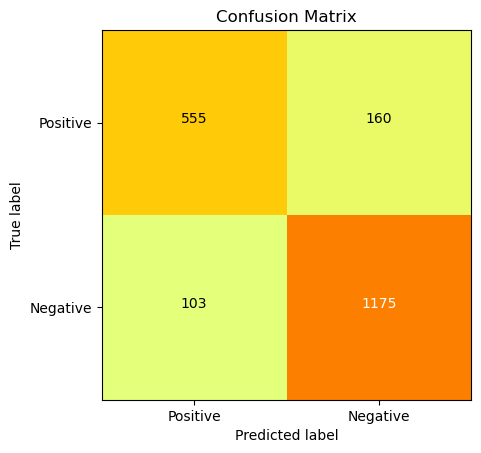

[[ 555  160]
 [ 103 1175]]
Metric        Score
---------  --------
ROC AUC    0.847815
Precision  0.88015
Recall     0.919405
F1         0.899349
Accuracy   0.868038


In [1949]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

####  Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [1952]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


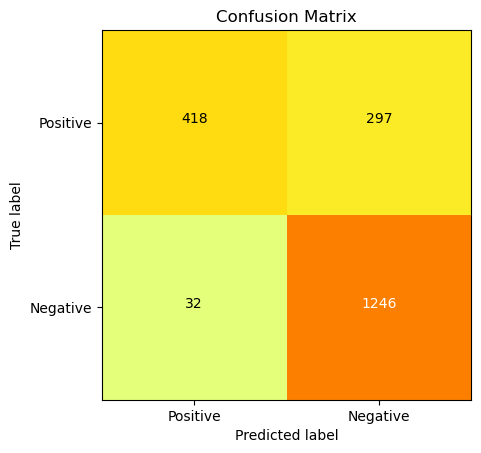

[[ 418  297]
 [  32 1246]]
Metric        Score
---------  --------
ROC AUC    0.779788
Precision  0.807518
Recall     0.974961
F1         0.883375
Accuracy   0.834922


In [1953]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 443 instances are labeled as True Positive (correctly predicted as positive)
* 320 instances are labeled as False Positive (incorrectly predicted as positive)
* 1189 instances are labeled as True Negative (correctly predicted as negative)
* 41 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [1956]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWar

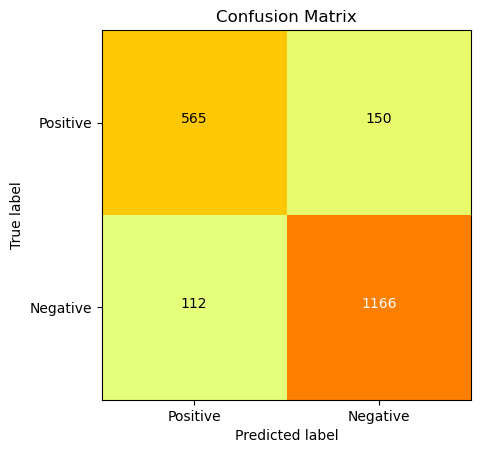

[[ 565  150]
 [ 112 1166]]
Metric        Score
---------  --------
ROC AUC    0.851286
Precision  0.886018
Recall     0.912363
F1         0.898998
Accuracy   0.86854


In [1957]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 566 instances are labeled as True Positive (correctly predicted as positive)
* 197 instances are labeled as False Positive (incorrectly predicted as positive)
* 1100 instances are labeled as True Negative (correctly predicted as negative)
* 130 instances are labeled as False Negative (incorrectly predicted as negative)

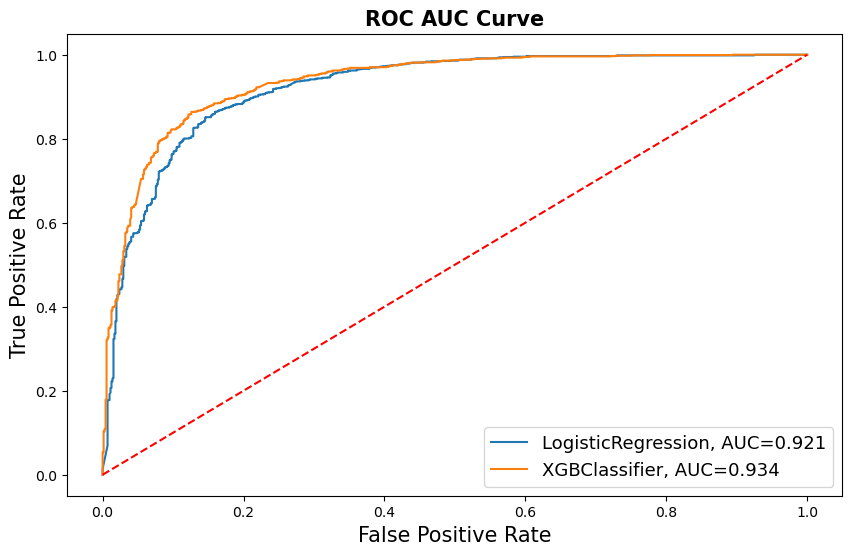

In [1959]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 Recommendation System

In [1962]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [1963]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1964]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours    5.00
1  Anusha Tirumalaneedi  Beyond Flavours    5.00
2       Ashok Shekhawat  Beyond Flavours    5.00
3        Swapnil Sarkar  Beyond Flavours    5.00
4                Dileep  Beyond Flavours    5.00

In [1965]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating['Rated_Restaurant'][0]
user_rating.head()

Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [1966]:
user_rating['Rated_Restaurant'][0]


[{'Restaurant': 'Zega - Sheraton Hyderabad Hotel', 'Rating': 5.0}]

In [1967]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))), 
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

In [1968]:
#getting output
user_preference_vector.sample(5)

Restaurant                Reviewer  Beyond Flavours  Paradise  Flechazo  \
2020        Hareesh Chowdary Muvva             0.00      0.00      0.00   
5678                 Sheela Ippili             0.00      0.00      0.00   
1500                      Deep Dey             0.00      0.00      0.00   
5952                          Siva             0.00      0.00      0.00   
1934               Gopalreddymudem             0.00      0.00      0.00   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
2020                                  0.00                        0.00   
5678                                  0.00                        5.00   
1500                                  0.00                        0.00   
5952                                  0.00                        0.00   
1934                                  0.00                        0.00   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
2020                         0.00     0.00                      0.00   
5678                         0.00     0.00                      0.00   
1500                         0.00     0.00                      0.00   
5952                         0.00     0.00                      0.00   
1934                         0.00     0.00                      0.00   

Restaurant  Hyper Local  ...  Arena Eleven  \
2020               0.00  ...          0.00   
5678               0.00  ...          0.00   
1500               0.00  ...          0.00   
5952               0.00  ...          0.00   
1934               0.00  ...          0.00   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
2020                                           0.00   
5678                                           0.00   
1500                                           0.00   
5952                                           0.00   
1934                                           0.00   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
2020                                        0.00                      0.00   
5678                                        0.00                      0.00   
1500                                        0.00                      0.00   
5952                                        0.00                      0.00   
1934                                        0.00                      0.00   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
2020                  0.00        0.00               0.00   
5678                  0.00        0.00               0.00   
1500                  0.00        0.00               0.00   
5952                  0.00        0.00               0.00   
1934                  0.00        0.00               0.00   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
2020                                   0.00      0.00              0.00  
5678                                   0.00      0.00              0.00  
1500                                   0.00      0.00              0.00  
5952                                   0.00      0.00              0.00  
1934                                   0.00      0.00              0.00  

[5 rows x 101 columns]

In [1969]:
#using dot multiplication to find score or weight for each reviewer 
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [1970]:
#getting output
result_df[:5]

Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN     0.00   0.00    0.00  5.00 0.00   0.00   
1          #chloesviews // CAH     0.00   0.00    0.00  0.00 0.00   0.00   
2                         $ign     0.00   0.00    0.00  0.00 0.00   0.00   
3                     4mybanti     0.00   2.00    0.00  0.00 0.00   0.00   
4  @FuloriBinaChutneyKaiseBani     0.00   0.00    0.00  0.00 0.00   0.00   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0      0.00    0.00   0.00  ...         0.00  0.00  0.00    0.00         0.00   
1      0.00    0.00   0.00  ...         5.00  0.00  0.00    0.00         5.00   
2      0.00    0.00   0.00  ...         4.00  0.00  0.00    0.00         0.00   
3      0.00    0.00   0.00  ...         2.00  0.00  0.00    0.00         0.00   
4      0.00    0.00   0.00  ...         0.00  0.00  0.00    5.00         0.00   

  Spanish Street Food Sushi Thai Wraps  
0    0.00        0.00  5.00 0.00  0.00  
1    0.00        0.00  0.00 0.00  0.00  
2    0.00        0.00  0.00 0.00  0.00  
3    0.00        0.00  0.00 0.00  0.00  
4    0.00        0.00  0.00 0.00  0.00  

[5 rows x 45 columns]

In [1971]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

Reviewer                                   Rated_Restaurant  \
655         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3858   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2654         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
2313     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   
7013  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   

      Rated_Restaurant_Count  
655                       13  
3858                      13  
2654                      12  
2313                      11  
7013                      11

In [1972]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [1973]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
655   Ankita    12.00  12.00    0.00  0.00 0.00   4.00      0.00    8.00   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
655   0.00  ...        36.00  0.00  4.00    0.00        13.00    0.00   

    Street Food Sushi Thai Wraps  
655        0.00  4.00 0.00  4.00  

[1 rows x 45 columns]

In [1974]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [1975]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [1976]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [1977]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [1978]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1979]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [1980]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [1981]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        
        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values
        
        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])
                
    return users, restaurant, scores

In [1982]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

User                            Restaurant  Score
0          Ankita                       Beyond Flavours  91.00
1          Ankita                              Paradise  70.00
2          Ankita                              Flechazo  44.00
3          Ankita        Shah Ghouse Hotel & Restaurant  70.00
4          Ankita            Over The Moon Brew Company  74.00
...           ...                                   ...    ...
28336  Simi Reddy                              Delhi-39  10.00
28337  Simi Reddy                    Al Saba Restaurant  15.00
28338  Simi Reddy                               T Grill  20.00
28339  Simi Reddy  Collage - Hyatt Hyderabad Gachibowli  14.00
28340  Simi Reddy                            Desi Bytes  10.00

[28341 rows x 3 columns]

In [1983]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   691
57            Over The Moon Brew Company   672
13                       Beyond Flavours   667
63                            PourHouse7   667
56                          Olive Garden   638

In [1984]:
#least recommended restaurant
recom_rest[-5:]

Restaurant  User
84       Zing's Northeast Kitchen    11
9                          B-Dubs     5
78  The Old Madras Baking Company     2
52            Mohammedia Shawarma     2
53                  Momos Delight     1

In [1985]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [1986]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

User                             Recommended_Restaurant  \
59    Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
301          Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
425          Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
734     Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
51          Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
33    Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
763        Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
395  Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
382   Moonis Ahmed  [{'Restaurant': 'Beyond Flavours', 'Score': 28...   
867   Vedant Killa  [{'Restaurant': 'Beyond Flavours', 'Score': 34...   

     Total_Recommendation  
59                     72  
301                    71  
425                    71  
734                    69  
51                     69  
33                     69  
763                    68  
395                    68  
382                    67  
867                    67

In [1987]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

Restaurant  Score
0                        Beyond Flavours  91.00
31                           Owm Nom Nom  82.00
56                          Olive Garden  82.00
64  Collage - Hyatt Hyderabad Gachibowli  82.00
40                            PourHouse7  82.00
..                                   ...    ...
60                                  GD's  12.00
51                               Labonel  12.00
65                        Dunkin' Donuts  12.00
29                          Karachi Cafe  12.00
16                            Tiki Shack  12.00

[69 rows x 2 columns]

⚡ Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task. 

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items. 

In [1989]:
bows_df.sample(5)

doc_index                                 doc_id       token  bow
83200        3455  Mazzo - Marriott Executive Apartments         etc    1
12685         553                  The Fisherman's Wharf      regret    1
80953        3402  Mazzo - Marriott Executive Apartments      friend    1
133721       5745                           Being Hungry  completely    1
147810       6390                           Dine O China    schezwan    1

In [1990]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [1991]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

Restaurant  \
2491                     SKYHY   
5519                Cafe Eclat   
7387               Driven Cafe   
6040                PourHouse7   
1080  Sardarji's Chaats & More   

                                                 Review  
2491  [good, servicefoods, really, delicious, waiter...  
5519  [real, craving, chocolate, ordered, death, cho...  
7387  [visit, place, quite, oftenthe, ambience, amaz...  
6040  [bad, food, bad, service, ordered, pizza, veg,...  
1080  [worst, daal, makhani, ever, tasted, life, kin...

In [1992]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

In [1993]:
#converting bow to horizontal format using pivot 
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [1994]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [1995]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [1996]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base    1.00        3.00        0.00    1.00    1.00   
1  Biryanis And More  compare    0.00        3.00        1.00    1.00    0.00   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0    0.00      1.00 1.00  ... 0.00 0.00      0.00 0.00  0.00 1.00 0.00 0.00   
1    1.00      1.00 1.00  ... 1.00 1.00      1.00 1.00  1.00 0.00 4.00 1.00   

     😕  😪😪😪😪  
0 0.00  0.00  
1 1.00  1.00  

[2 rows x 1334 columns]

In [1997]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763059

In [1998]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [2266]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

Beyond Flavours Paradise Flechazo  \
Beyond Flavours                               1     0.82     0.84   
Paradise                                   0.82        1     0.75   
Flechazo                                   0.84     0.75        1   
Shah Ghouse Hotel & Restaurant             0.61     0.65     0.52   
Over The Moon Brew Company                 0.82     0.71     0.79   
...                                         ...      ...      ...   
Desi Bytes                                 0.68     0.64     0.59   
Hyderabadi Daawat                          0.68     0.63     0.62   
Zega - Sheraton Hyderabad Hotel            0.82     0.67     0.78   
Triptify                                   0.53     0.46     0.44   
Chinese Pavilion                           0.73     0.63     0.67   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                           0.61   
Paradise                                                  0.65   
Flechazo                                                  0.52   
Shah Ghouse Hotel & Restaurant                               1   
Over The Moon Brew Company                                0.54   
...                                                        ...   
Desi Bytes                                                0.60   
Hyderabadi Daawat                                         0.75   
Zega - Sheraton Hyderabad Hotel                           0.58   
Triptify                                                  0.48   
Chinese Pavilion                                          0.59   

                                Over The Moon Brew Company  \
Beyond Flavours                                       0.82   
Paradise                                              0.71   
Flechazo                                              0.79   
Shah Ghouse Hotel & Restaurant                        0.54   
Over The Moon Brew Company                               1   
...                                                    ...   
Desi Bytes                                            0.61   
Hyderabadi Daawat                                     0.62   
Zega - Sheraton Hyderabad Hotel                       0.83   
Triptify                                              0.47   
Chinese Pavilion                                      0.68   

                                The Fisherman's Wharf eat.fit  \
Beyond Flavours                                  0.82    0.65   
Paradise                                         0.65    0.55   
Flechazo                                         0.78    0.51   
Shah Ghouse Hotel & Restaurant                   0.58    0.65   
Over The Moon Brew Company                       0.82    0.53   
...                                               ...     ...   
Desi Bytes                                       0.63    0.67   
Hyderabadi Daawat                                0.69    0.64   
Zega - Sheraton Hyderabad Hotel                  0.86    0.59   
Triptify                                         0.49    0.61   
Chinese Pavilion                                 0.74    0.63   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                     0.40        0.83   
Paradise                                            0.38        0.71   
Flechazo                                            0.37        0.77   
Shah Ghouse Hotel & Restaurant                      0.53        0.61   
Over The Moon Brew Company                          0.42        0.82   
...                                                  ...         ...   
Desi Bytes                                          0.44        0.67   
Hyderabadi Daawat                                   0.48        0.69   
Zega - Sheraton Hyderabad Hotel                     0.42        0.82   
Triptify                                            0.40        0.53   
Chinese Pavilion                                    0.45        0.72   

                   

In [2268]:
#creating function for mapping 
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [2270]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [2272]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [2274]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

0.6043971333550248

In [2276]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]
                
                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [2278]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [2280]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [2282]:
#getting the output
res_sim_df.sample(10)

USER                               RESTAURANT  SCORE
23954        Sandhya                                   Faasos   0.68
69423   Samrat Ghosh                          Behrouz Biryani   0.63
31229  Anjali Sharma                          Beyond Flavours   0.70
35766     Neha Rathi                               Pot Pourri   0.66
49879     Pn Santosh                     Marsala Food Company   0.70
34709         Yogesh                         Chinese Pavilion   0.68
16661   Bharti Mehta  Cascade - Radisson Hyderabad Hitec City   0.69
5406       Keerthi M                            Pakwaan Grand   0.79
26266        Deepthi         Feast - Sheraton Hyderabad Hotel   0.80
8034     Rohit Reddy                            Mathura Vilas   0.78

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Content-based filtering is a technique used in recommendation systems to recommend items to users based on their past preferences or interactions with items. It works by analyzing the attributes of the items and user preferences, and recommending items that have similar attributes.

In content-based filtering, a user profile is created, which includes information about the user's preferences, such as the genres of restaurant they like, the types of books they read, etc. When a user wants to see recommendations, the system looks at the attributes of the items and compares them to the user's profile. Items that have attributes that match the user's preferences are recommended.

For example, in a restaurant recommendation system, a user's profile may include information about the genres of restaurant they like. If a user likes chinese or italian or indian restaurant, the system will recommend other chinese or italian or indian restaurant to them.

Content-based filtering can also be used to recommend items to new users who have not yet interacted with the system. In this case, the system will recommend items based on their attributes, rather than on the user's past preferences.

Content-based filtering can be used in conjunction with other techniques, such as collaborative filtering, to improve the accuracy of recommendations.

The machine learning model used for content-based filtering can vary depending on the type of data and attributes of the items. Some models used in content-based filtering include:

Cosine similarity: This is a measure of similarity between two vectors, which can be used to compare the attributes of items. Cosine similarity ranges between -1 and 1, where 1 means the vectors are identical and -1 means they are completely dissimilar.

Nearest Neighbors: This algorithm finds the k-nearest items to a given item based on their attributes. It is often used in recommendation systems to recommend items similar to the ones a user has interacted with in the past.

Vector Space Model: This algorithm represents items as vectors in a multi-dimensional space, where the dimensions represent the attributes of the items. Similarity between items is then calculated based on the distance between their vectors in this space.

#### Cross- Validation & Hyperparameter Tuning

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

* Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
* Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
* F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
* Accuracy is the proportion of correctly classified instances among all instances.

The specific evaluation metric to use will depend on the specific use case and the relative costs of false positives and false negatives. For a positive business impact, **F1-score** can be considered as it balances the precision and recall to give an overall performance measure.

* XGBoost is highly regularized, which helps to prevent overfitting, making it more robust to unseen data. As a supervised learning algorithm, XGBoost can be trained on labeled data to predict sentiment labels.

* XGBoost's ensemble nature can help to improve the performance of sentiment analysis by combining the predictions of multiple models.

* XGBoost's regularization can help to prevent overfitting and make the model more robust to unseen data, which is important in sentiment analysis where the model needs to generalize to new data.

* XGBoost's speed and efficiency can be beneficial in sentiment analysis, where large datasets are common and the model needs to make predictions quickly.

* XGBoost's built-in feature selection mechanism can be used to automatically select the most important features in a dataset, which can be useful in sentiment analysis where the data is high dimensional and it is important to focus on the most relevant features.

* XGBoost's gradient-boosted decision trees algorithm can be highly effective in sentiment analysis as it can learn complex relationships between features and sentiment labels.

XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm make it a powerful tool for sentiment analysis.

In [2289]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test) 

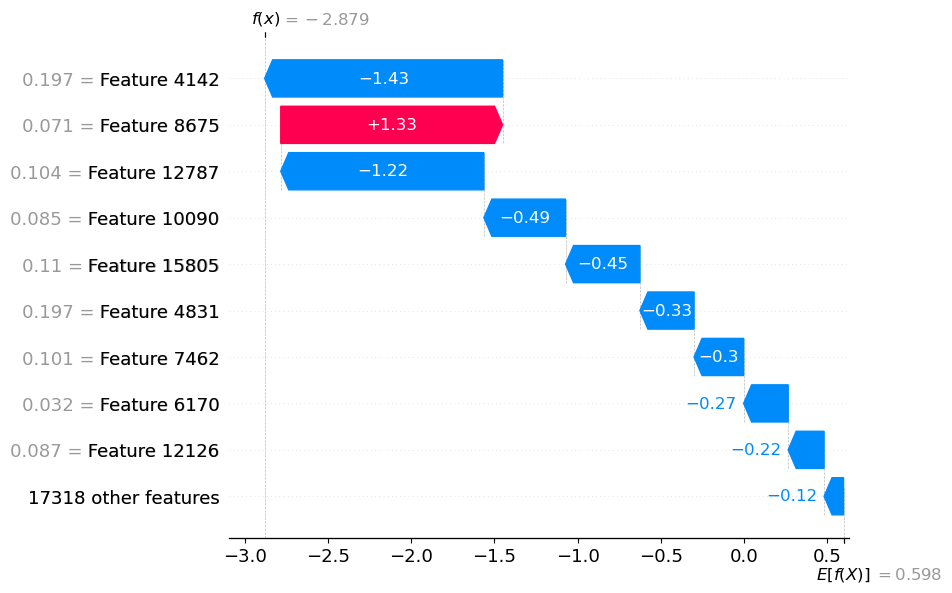

In [2291]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 0.584. The ending value is f(x) = -0.382. The SHAP values are all the values in between.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [2297]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

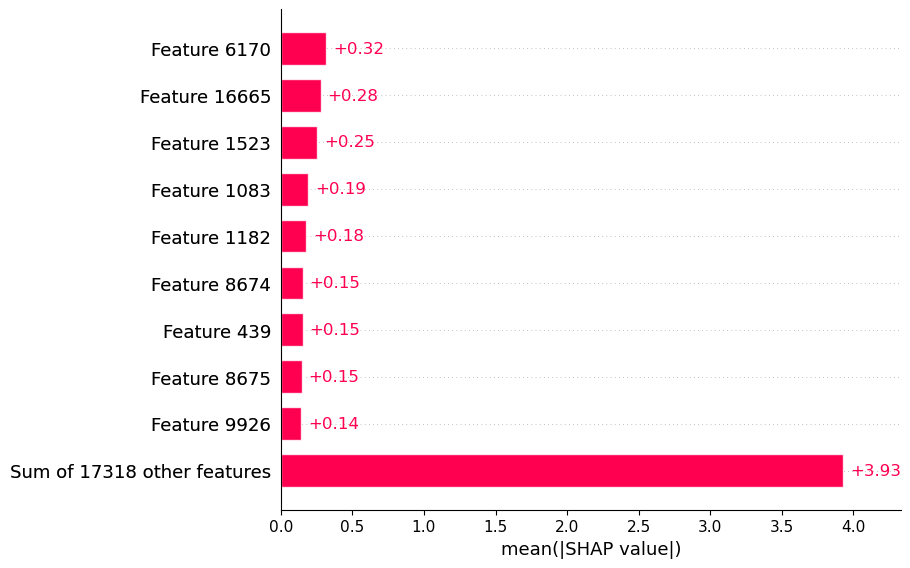

In [2299]:
#Mean SHAP
shap.plots.bar(shap_values)

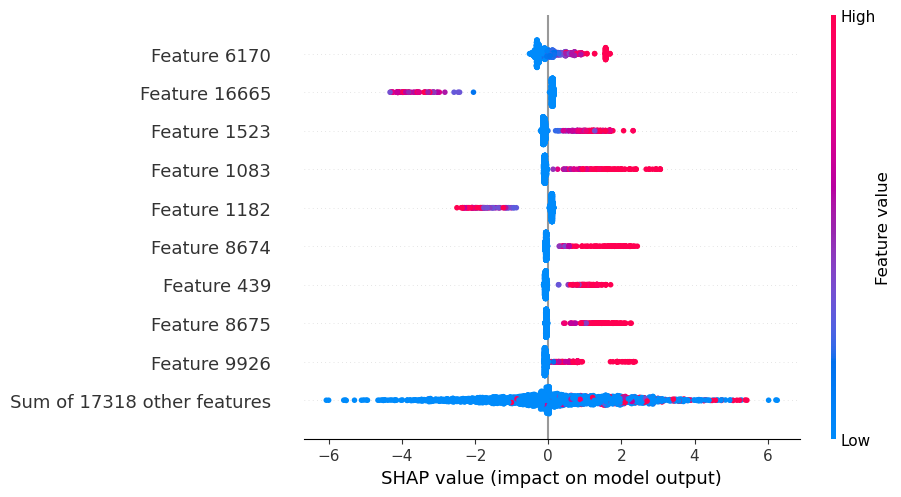

In [2301]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

* X_test which was originally the text data, which was converted into numerical feature using different preprocessing steps. Here, with all those shap model we can see some feature are very much important during prediction and these feature have seeinlgy weird name because the feature is likely a specific word or phrase in the text data that the model has learned is important for determining the sentiment.

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶
* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.